In [1]:
# ============================
# ECG Heartbeat Classification
# ============================

In [2]:
# VF = 10 mars 2019

In [3]:
# VI = 13 nov 2018


* [Paper](https://arxiv.org/pdf/1805.00794.pdf)

Signification des labels :

| Category(data)        |  Category(Paper)     | Annotations  |
| ------------- |:-------------:| -----:|
|0|N| <ul><li>Normal</li><li>Left/Right bundle branch block</li><li>Arial escape</li><li>Nodal escape</li></ul>  |
|1|S| <ul><li>Atrial premature</li><li>Aberrant atrial premature</li><li>Nodal premature</li><li>Supra-ventricular premature</li></ul> |
|2|V| <ul><li>Premature ventricular contraction</li><li>Ventricular escape</li></ul> |
|3|F| <ul><li>Fusion of ventricular and normal</li></ul> |
|4|Q| <ul><li>Paced</li><li>Fusion of paced and normal</li><li>Unclassifiable</li></ul> |



In [4]:

#==========================================================================================#
# probleme de classificiation multi-classes de courbe de signal avec classes desequilibrees
#==========================================================================================#

#  Yi,k > k = 5 classes
#  Xi pour i [0,187]

# http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/ml_imbalanced.html
# http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/ml_b_imbalanced.html
# https://riptutorial.com/Download/



In [5]:
#=========== ONTHOLOGIE ===========
# https://arxiv.org/pdf/1805.00794.pdf
# https://blog.goodaudience.com/heartbeat-classification-detecting-abnormal-heartbeats-and-heart-diseases-from-ecgs-913449c2665
# https://www.kaggle.com/shayanfazeli/heartbeat/home

# https://www.sciencedirect.com/science/article/pii/S1746809418301976
# https://github.com/mondejar/ecg-classification


#================================== THESE
# https://www.researchgate.net/publication/301285813_Contributions_a_l'analyse_et_au_traitement_des_signaux_biomedicaux_non_stationnaires_Applications_aux_electrocardiogrammes_et_electroencephalogrammes


#================================== PANDAS mise en DF
# https://www.kaggle.com/coni57/model-from-arxiv-1805-00794/notebook

#** classification de signal == Reconnaissance d’arythmies cardiaques
# https://www.irisa.fr/programme30ans/Flyers/LivretFlyers.pdf

#** pandas > preprocessing TS[code avec groupby]
# https://github.com/Koenigsweg/data-timeseries-analysis-with-pandas

#*******************************************************************************************************
#** pandas > Comment convertir une série chronologique en problème d’apprentissage supervisé en Python
# https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
#*******************************************************************************************************


#================================== signal en python
# http://www.scipy-lectures.org/intro/scipy.html#signal-processing-scipy-signal
# http://dobigeon.perso.enseeiht.fr/teaching/signal/MODAP_TS_URSAFE.pdf

# http://www.paulvangent.com/2016/03/15/analyzing-a-discrete-heart-rate-signal-using-python-part-1/


#*** mini tuto -- SEO = machinelearningmastery.com + introduction-to-time-series-forecasting-with-python + pdf
# https://machinelearningmastery.com/introduction-to-time-series-forecasting-with-python/

#*** mini tuto -- SEO = machine learning time series classification
# https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424
# https://machinelearningmastery.com/time-series-forecasting-supervised-learning/

#** Regularization and feature selection
# https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python

#================================== notebook py a traiter : classifieur
# https://github.com/gakhov/pycon-ua-2018
# https://www.researchgate.net/profile/Andrii_Gakhov/publication/324889271_An_Introduction_to_Time_Series_Forecasting_with_Python/links/5ae9659b45851588dd8179c8/An-Introduction-to-Time-Series-Forecasting-with-Python.pdf?origin=publication_detail
# 1. data processing
# 2. svm clqssifieur
# 3. nn  classifieur

#================================== Apprendre en profondeur pour la classification des séries chronologiques
# https://arxiv.org/pdf/1809.04356.pdf

In [6]:
# https://tel.archives-ouvertes.fr/tel-01839074/file/TH2018BenkabouSeifEddine.pdf

# nous nous intéressons à cette problématique pour les
# données complexes et particulièrement pour les séries temporelles uni et multi-variées.

# Le terme "anomalie" peut désigner une observation qui s’écarte des autres observations
# au point d’éveiller des soupçons. 

# De façon plus générale, la problématique sous-jacente
# (aussi appelée détection de nouveautés ou détection de valeurs aberrantes) vise à identifier,
# dans un ensemble de données, celles qui diffèrent significativement des autres,
# qui ne se conforment pas à un "comportement attendu" (à définir ou à apprendre automatiquement),
# et qui indiquent un processus de génération différent. Les motifs "anormaux"
# ainsi détectés se traduisent souvent par de l’information critique



# LIBRARIES

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sb
# https://seaborn.pydata.org/ #visualiser des data stats

import scipy as sc
# https://openclassrooms.com/fr/courses/1503446-la-programmation-scientifique-avec-python/1503861-scipy-une-trousse-a-outils-quelle-est-bien
# pour traiter du signal, transformee de fourrier

sb.set_style("whitegrid")
import matplotlib.pyplot as plt


CMAP = plt.get_cmap("Set1")
COLOR = [CMAP(k) for k in range(5)]
NAME_DIC = {k:v for k,v in zip([0,1,2,3,4],['N','S','V','F','Q'])}

#scikit-learn
import sklearn

# library math
import math
from math import *

# rechargement rapide jupyter context
%reload_ext autoreload
%autoreload 2


# temps execution code
import time



In [8]:
tps00=time.clock()

In [9]:
# verifier version des libraries py
print("pandas version =", pd.__version__)
print("numpy version =", np.__version__)

#vérification de la version
print("scikit-learn =", sklearn.__version__)


pandas version = 0.24.1
numpy version = 1.16.2
scikit-learn = 0.20.2


# PARTIE - SIGNAUX BRUTS

## Preprocessing (preparation des donnees)

### Lecture des données

*In all of our experiments, we have used ECG lead II re-sampled to the sampling frequency of 125Hz as the input.*

Sampling : 125HZ, ie, a value every 0.008 seconds. One signal has 187 values over 1.488s 

In [10]:
# frequence mesures = 1/125 = 0.008 secondes 
# duree enregistrement = 0.008 * 187 valeurs = 1496 sec / 60 = 25 mn
# 187 Xi + label

In [11]:
# Nom des colonnes
Colnames = [str(k) for k in range(187)] + ["label"]
print("nom des colonnes", Colnames)

nom des colonnes ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', 

#### train

In [12]:
#==================
# Train DATA (***)
#==================

mitbih_train = pd.read_csv("mitbih_train.csv.zip", header=None, names=Colnames)
N_train = mitbih_train.shape[0]


In [13]:
#==================
# Train DATA
#==================

# type de data
print("type de fichier data", type(mitbih_train))

# dimension du dataframe
print("dimension dataframe", mitbih_train.shape)

# affichage des 5 premieres lignes
mitbih_train.head(2)

# affichage du type des Xi
#print("type de Xi", mitbih_train.dtypes)


type de fichier data <class 'pandas.core.frame.DataFrame'>
dimension dataframe (87554, 188)


0         1         2         3         4         5         6  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

          7         8         9  ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  label  
0  0.0    0.0  
1  0.0    0.0  

[2 rows x 188 columns]

In [14]:
#===============================
# DATASET TRAIN SANS ETIQUETTE
#===============================
a=mitbih_train.iloc[:,0:187]

In [15]:
#a.head()

In [16]:
# dimension du pb = 87554 lignes * 188 xi [n>p]

#### test

In [17]:
#==================
# Test DATA
#==================
#mitbih_test = pd.read_csv("mitbih_test.csv.zip", header=None, names = Colnames)
mitbih_test = pd.read_csv("mitbih_test.csv", header=None, names = Colnames)

N_test = mitbih_test.shape[0]

print(mitbih_test.shape)

mitbih_test.head(2)

(6774, 188)


0         1         2         3         4         5         6         7  \
0  1.0  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677  0.142216   
1  1.0  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972  0.283747   

          8         9  ...  178  179  180  181  182  183  184  185  186  label  
0  0.121257  0.107784  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0  
1  0.275482  0.272727  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0  

[2 rows x 188 columns]

In [18]:
# ===========================
# DATASET TEST SANS ETIQUETTE
# ===========================

b=mitbih_test.iloc[:,0:187]
b.head(5)

0         1         2         3         4         5         6  \
0  1.000000  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677   
1  1.000000  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972   
2  0.972840  0.728395  0.000000  0.037037  0.162963  0.143210  0.123457   
3  1.000000  0.694444  0.238095  0.321429  0.337302  0.337302  0.301587   
4  0.939815  0.791667  0.199074  0.000000  0.055556  0.101852  0.106481   

          7         8         9  ...  177  178  179  180  181  182  183  184  \
0  0.142216  0.121257  0.107784  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.283747  0.275482  0.272727  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.140741  0.133333  0.096296  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.325397  0.325397  0.333333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.143519  0.222222  0.189815  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 187 columns]

#### split train vs test - sanity check

In [19]:
# longueur TRAIN
trainlongueur = len(mitbih_train)
trainlongueur

87554

In [20]:
# longueur TEST
testlongueur = len(mitbih_test)
testlongueur

6774

In [21]:
# longueur TOTAL
totlongueur = trainlongueur + testlongueur
totlongueur

94328

In [22]:
# poids Train
poidsTrain = trainlongueur / totlongueur
round(poidsTrain,4)

0.9282

In [23]:
# poids Test
poidsTest = testlongueur / totlongueur
round(poidsTest,4)

0.0718

In [24]:
# poids Total
poidsTOT  = poidsTrain + poidsTest
poidsTOT

1.0

### Valeur manquante

In [25]:
# existe-il des Valeurs manquantes TRAIN:
print("nb de valeur manquante = ",mitbih_train.isnull().sum().sum())

nb de valeur manquante =  0


In [26]:
# existe-il des Valeurs manquantes TEST:
print("nb de valeur manquante = ",mitbih_test.isnull().sum().sum())

nb de valeur manquante =  0


In [27]:
# commentaires = en train ou en test, zero valeur manquante

### Statistiques univariees 

#### train

In [28]:
# stats descriptives - dataframe
mitbih_train.describe()

0             1             2             3             4  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.210399      0.205808      0.201773      0.198691      0.196757   
std        0.171909      0.178481      0.177240      0.171778      0.168357   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.088416      0.073333      0.066116      0.065000      0.068639   
50%        0.158798      0.145324      0.144424      0.150000      0.148734   
75%        0.287628      0.298237      0.295391      0.290832      0.283636   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...           178           179           180           181  \
count  ...  87554.000000  87554.000000  87554.000000  87554.000000   
mean   ...      0.005025      0.004628      0.004291      0.003945   
std    ...      0.044154      0.042089      0.040525      0.038651   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

                182           183           184           185           186  \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.003681      0.003471      0.003221      0.002945      0.002807   
std        0.037193      0.036255      0.034789      0.032865      0.031924   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              label  
count  87554.000000  
mean       0.473376  
std        1.143184  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        4.000000  

[8 rows x 188 columns]

In [29]:
# histogramme Xi / Xi
# https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb

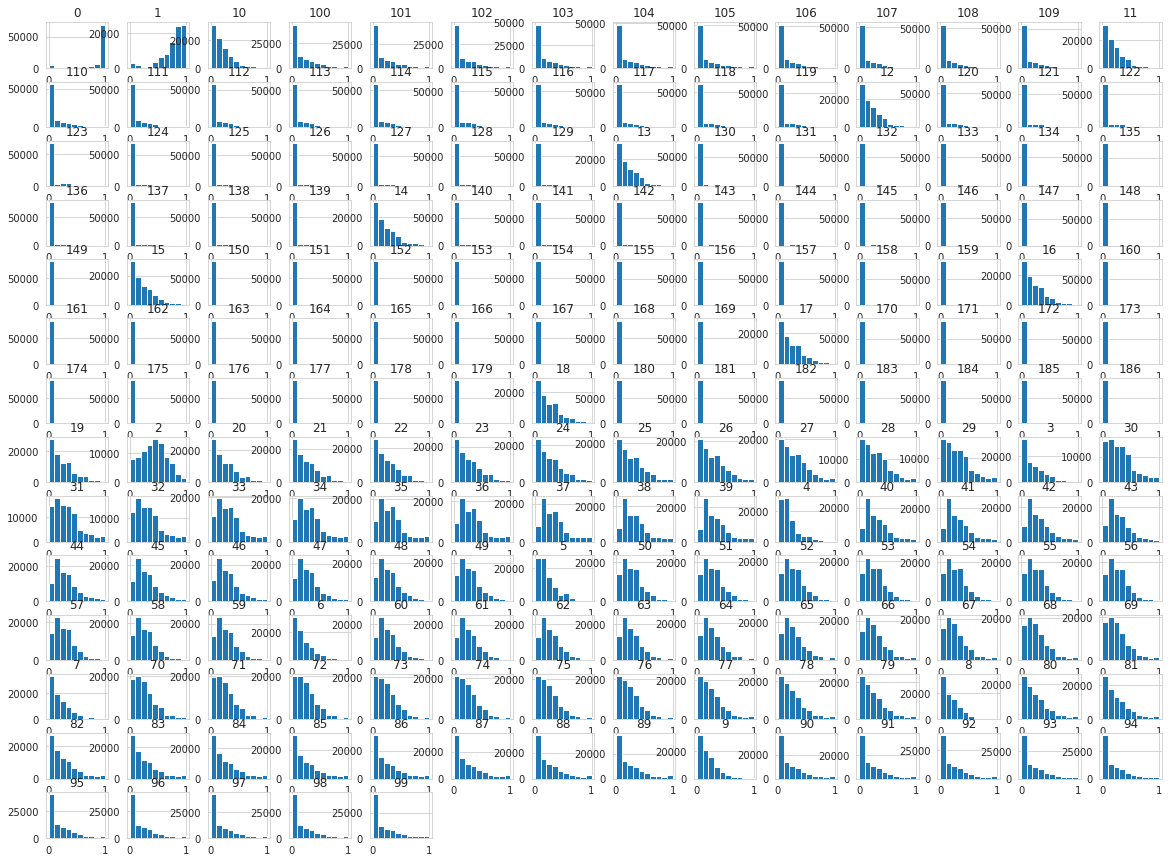

In [30]:
# histogramme des Xi
%matplotlib inline
import matplotlib.pyplot as plt
a.hist(bins=10, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [31]:
# analyse : lecture des histogrammes (Xi), pas de figure en cloche.
# les Xi ne suivent pas une Loi gaussienne [?] - a verifier = test de shapiro Wilks.

Text(0.5, 1.0, 'distribution des valeurs moyennes des Xi')

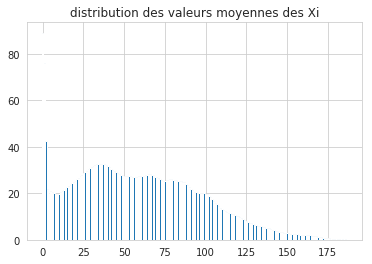

In [32]:
# moyenne
x = [i + 0.01 for i, _ in enumerate(a)]
y = a.mean()*100
plt.bar(x,y)
plt.title("distribution des valeurs moyennes des Xi")

Text(0.5, 1.0, 'distribution des EC des Xi')

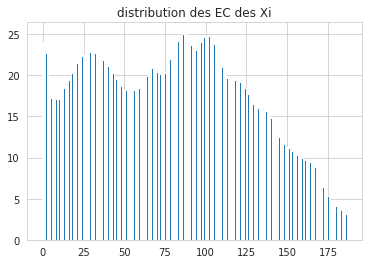

In [33]:
# ecart-type
x = [i + 0.01 for i, _ in enumerate(a)]
y = a.std()*100
plt.bar(x,y)
plt.title("distribution des EC des Xi")

Text(0.5, 1.0, 'distribution des Var des Xi')

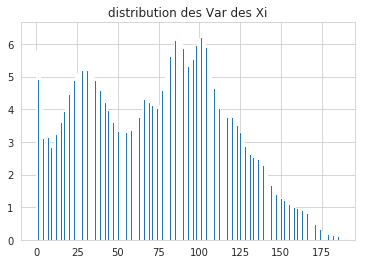

In [34]:
# Variance
x = [i + 0.01 for i, _ in enumerate(a)]
y = ((a.std())**2)*100
plt.bar(x,y)
plt.title("distribution des Var des Xi")

In [35]:
# Analyse : les 3 distributions mean, std et var (Xi) sont multi-modes {ie A PRENDRE EN COMPTE}

Text(0.5, 1.0, 'boxplot moy(xi)')

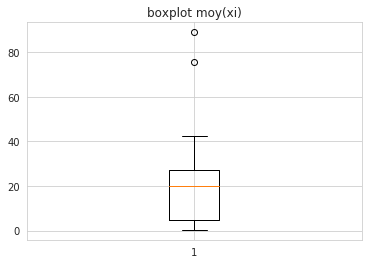

In [36]:
# moyenne
plt.boxplot(a.mean()*100)
plt.title("boxplot moy(xi)")

In [37]:
# analyse : presence de valeurs atypiques ?

Text(0.5, 1.0, 'boxplot std(xi)')

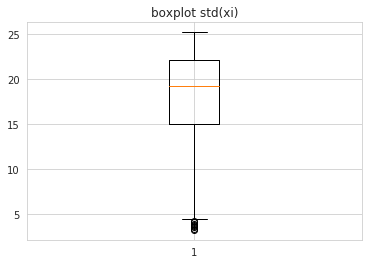

In [38]:
# EC
plt.boxplot(a.std()*100)
plt.title("boxplot std(xi)")

Text(0.5, 1.0, 'boxplot variance(xi)')

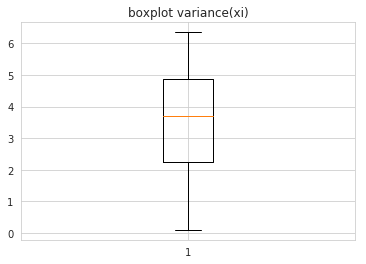

In [39]:
# Variance
x= ((a.std())**2)*100
plt.boxplot(x)
plt.title("boxplot variance(xi)")

#### test

In [40]:
# stats descriptives - dataframe
mitbih_test.describe()

0            1            2            3            4  \
count  6774.000000  6774.000000  6774.000000  6774.000000  6774.000000   
mean      0.840578     0.718833     0.475484     0.316535     0.284219   
std       0.281505     0.261873     0.250416     0.257477     0.233010   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.834086     0.580166     0.287945     0.094904     0.103629   
50%       0.968553     0.808772     0.484483     0.260126     0.208603   
75%       1.000000     0.914278     0.655369     0.497357     0.448235   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6            7            8            9  ...  \
count  6774.000000  6774.000000  6774.000000  6774.000000  6774.000000  ...   
mean      0.276256     0.262194     0.248167     0.231671     0.214874  ...   
std       0.216842     0.211743     0.198669     0.180688     0.170783  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.106638     0.090003     0.082961     0.083470     0.086349  ...   
50%       0.202860     0.189417     0.196453     0.199041     0.172150  ...   
75%       0.430453     0.411391     0.381593     0.333333     0.295082  ...   
max       1.000000     1.000000     1.000000     0.997143     0.991429  ...   

               178          179          180          181          182  \
count  6774.000000  6774.000000  6774.000000  6774.000000  6774.000000   
mean      0.009598     0.009079     0.008497     0.007953     0.007680   
std       0.064042     0.061988     0.059841     0.058454     0.057159   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.980392     1.000000     0.966102     0.985507     1.000000   

               183          184          185          186        label  
count  6774.000000  6774.000000  6774.000000  6774.000000  6774.000000  
mean      0.007481     0.006968     0.006704     0.006594     1.530853  
std       0.057319     0.055039     0.054555     0.054016     1.614705  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     1.000000  
75%       0.000000     0.000000     0.000000     0.000000     3.000000  
max       1.000000     1.000000     0.996053     1.000000     4.000000  

[8 rows x 188 columns]

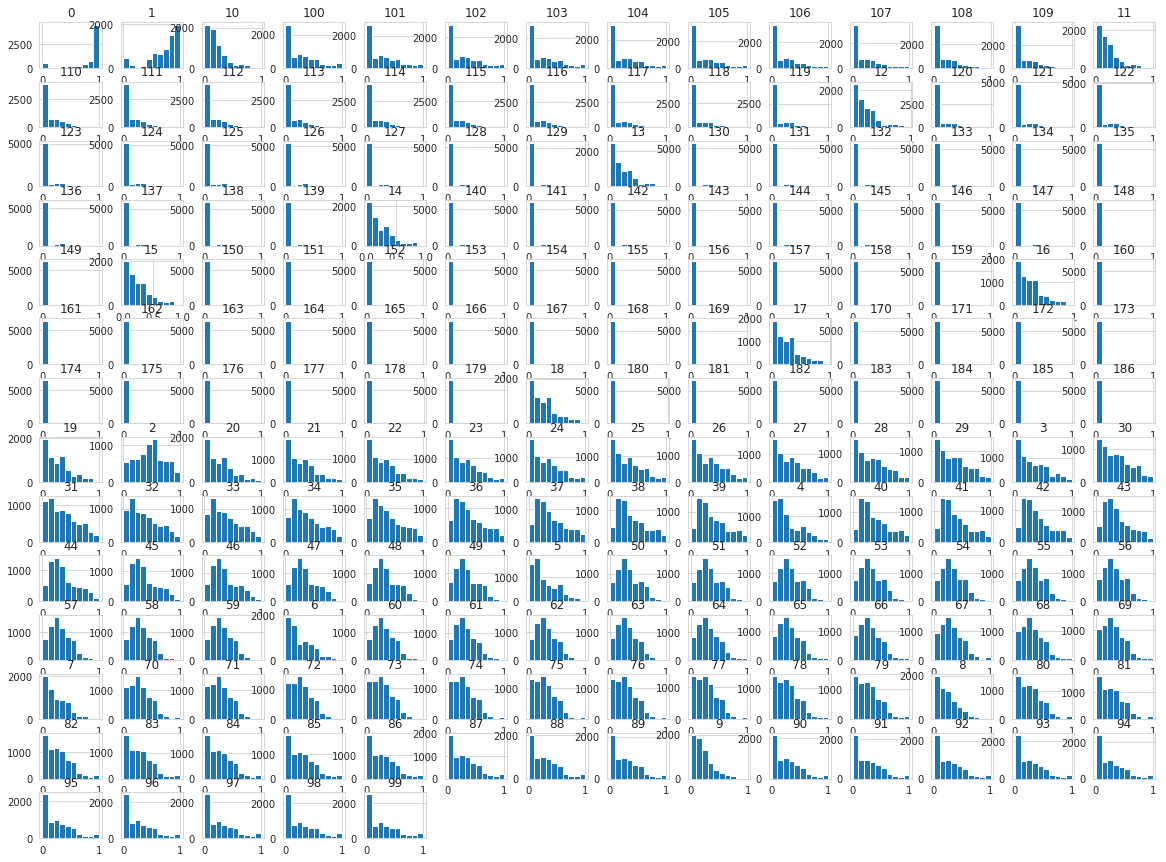

In [41]:
# histogramme des Xi
%matplotlib inline
import matplotlib.pyplot as plt
b.hist(bins=10, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

Text(0.5, 1.0, 'distribution des valeurs moyennes des Xi')

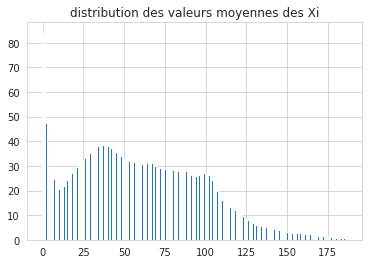

In [42]:
# moyenne
x = [i + 0.01 for i, _ in enumerate(b)]
y = b.mean()*100
plt.bar(x,y)
plt.title("distribution des valeurs moyennes des Xi")

Text(0.5, 1.0, 'distribution des EC des Xi')

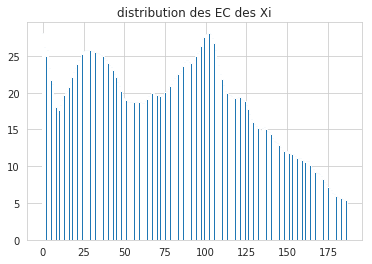

In [43]:
# ecart-type
x = [i + 0.01 for i, _ in enumerate(b)]
y = b.std()*100
plt.bar(x,y)
plt.title("distribution des EC des Xi")

Text(0.5, 1.0, 'distribution des Var des Xi')

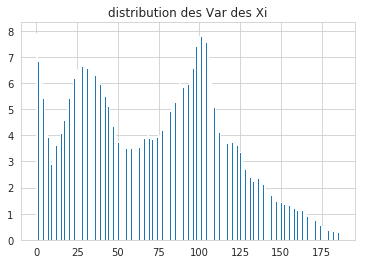

In [44]:
# Variance
x = [i + 0.01 for i, _ in enumerate(b)]
y = ((b.std())**2)*100
plt.bar(x,y)
plt.title("distribution des Var des Xi")

Text(0.5, 1.0, 'boxplot moy(xi)')

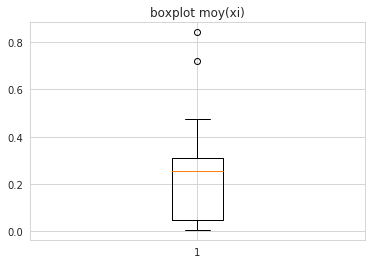

In [45]:
# moyenne
plt.boxplot(b.mean())
plt.title("boxplot moy(xi)")

Text(0.5, 1.0, 'boxplot std(xi)')

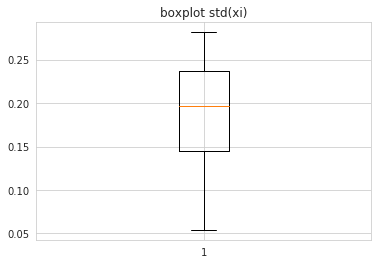

In [46]:
# EC
plt.boxplot(b.std())
plt.title("boxplot std(xi)")

Text(0.5, 1.0, 'boxplot variance(xi)')

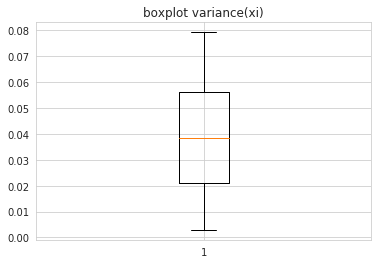

In [47]:
# Variance
x= ((b.std())**2)
plt.boxplot(x)
plt.title("boxplot variance(xi)")

In [48]:
# conclusion : TODO centrage - reduction et (normalisation des Xi ?) en train et test

### Statistiques bivariees

#### Scatter Plot

In [49]:
# autre code pour histo et scatterplot
# https://github.com/ageron/handson-ml/issues/40
# http://www.python-simple.com/python-matplotlib/scatterplot.php

# graphe nuage de points des Xi pris 2 a 2 et des Xi avec Yi
# pd.plotting.scatter_matrix(mitbih_train.select_dtypes(exclude=['category']),figsize=(10, 10)) 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7512443470>,
      dtype=object)

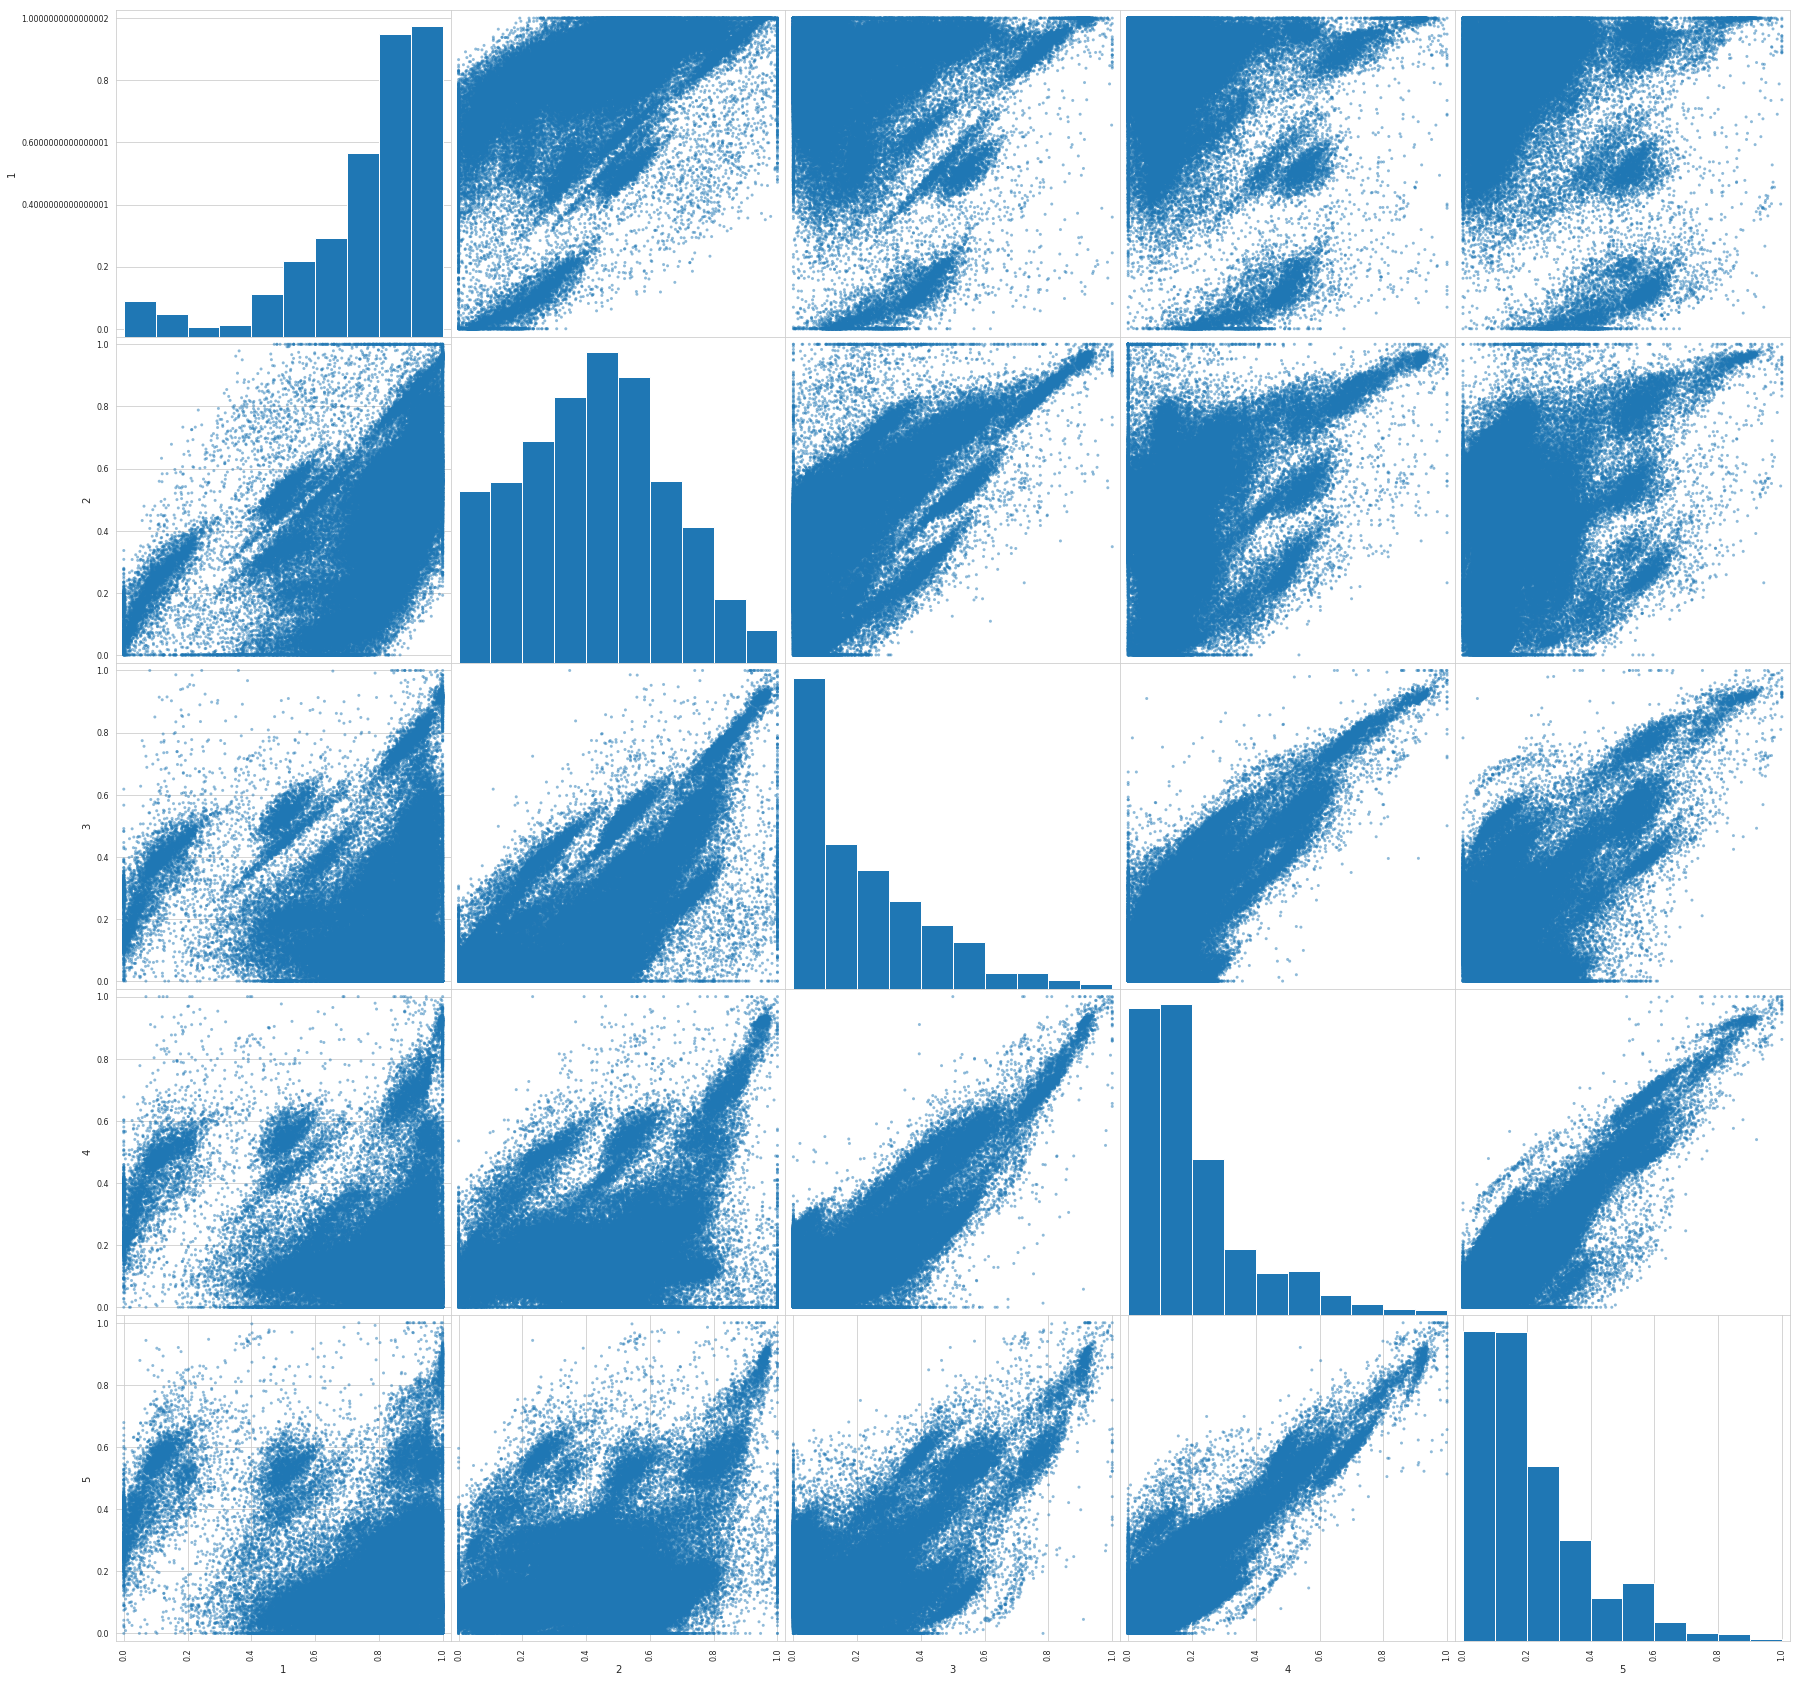

In [50]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

#attributes = ["median_house_value", "median_income"]

#attributes = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20",
#              "21","22","23","24","25","26","27","28","29","30"]

attributes = ["1","2","3","4","5"]
scatter_matrix(a[attributes], figsize=(30, 30))
#save_fig("scatter_matrix_plot")

In [51]:
# plus xi proches => plus les xi sont correles // moins les xi sont proches ==> moins elles sont correles

#### Matrice Variance et Covariance

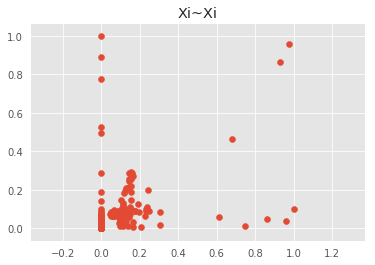

In [52]:
#https://datascienceplus.com/understanding-the-covariance-matrix/

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 4)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = a
y = a
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Xi~Xi')
plt.axis('equal');


In [53]:
# analyse : agglomerat centre valeur ~ 0.2

In [54]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[0.0311683 , 0.00969076],
       [0.00969076, 0.02564832]])

### Standardisation = Centrage-Reduction Xi

#### train

In [55]:
# http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf

# ==================
# Centrage-Reduction
# ==================

#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Za = sc.fit_transform(a)
print(Za)

[[ 0.36354765  0.75879683  1.13240614 ... -0.09259618 -0.08959366
  -0.08793965]
 [ 0.28954748  0.47376846  0.16526879 ... -0.09259618 -0.08959366
  -0.08793965]
 [ 0.45511319 -0.44497542 -1.04479413 ... -0.09259618 -0.08959366
  -0.08793965]
 ...
 [ 0.06543057 -0.60263006  0.75645932 ... -0.09259618 -0.08959366
  -0.08793965]
 [-0.13337832 -0.50759535  1.85477435 ... -0.09259618 -0.08959366
  -0.08793965]
 [ 0.04626936  0.39549766  1.65735418 ... -0.09259618 -0.08959366
  -0.08793965]]


In [56]:
# ============
# SANITY CHECK  - librairie numpy
# ============

# mitbih_train.describe()
#AttributeError: 'numpy.ndarray' object has no attribute 'describe'

# moyenne
print("moyenne des Xi",np.mean(Za,axis=0))

# ecart-type
print("ecart-type des Xi",np.std(Za,axis=0,ddof=0))


# variance
#print("variance des Xi",np.var(Za,axis=0,ddof=0))



moyenne des Xi [-1.33743110e-16  1.66205030e-16  3.11634432e-17 -2.07756288e-17
 -6.23268864e-17  0.00000000e+00 -3.11634432e-17  2.59695360e-17
 -4.41482112e-17  3.63573504e-17 -1.06475098e-16  1.55817216e-17
 -6.75207936e-17  5.19390720e-18  1.03878144e-17  8.76471840e-18
 -7.53116544e-17 -7.01177472e-17 -4.67451648e-17 -1.55817216e-17
  8.31025152e-17  9.34903296e-17 -6.75207936e-17 -7.27147008e-17
 -6.23268864e-17 -4.15512576e-17 -1.29847680e-16  0.00000000e+00
 -7.27147008e-17 -3.11634432e-17 -5.19390720e-17  7.27147008e-17
  4.15512576e-17  9.34903296e-17 -4.15512576e-17  4.15512576e-17
  4.15512576e-17  2.07756288e-17 -1.35041587e-16 -1.03878144e-16
 -6.23268864e-17  8.31025152e-17 -7.27147008e-17 -2.07756288e-17
  2.07756288e-17 -8.31025152e-17  2.07756288e-17  4.15512576e-17
  1.24653773e-16  4.15512576e-17  0.00000000e+00 -1.03878144e-16
 -6.23268864e-17  1.35041587e-16 -6.23268864e-17 -2.07756288e-17
 -1.03878144e-16 -5.71329792e-17 -1.24653773e-16 -3.63573504e-17
  3.116344

#### test

In [57]:
# ==================
# Centrage-Reduction
# ==================

#transformation – centrage-réduction
Zb = sc.fit_transform(b)
print(Zb)

[[ 0.56636123  0.15332458 -0.00970498 ... -0.1266013  -0.12290011
  -0.12209382]
 [ 0.56636123  0.10587212 -1.54685851 ... -0.1266013  -0.12290011
  -0.12209382]
 [ 0.46987096  0.03651501 -1.89891561 ... -0.1266013  -0.12290011
  -0.12209382]
 ...
 [ 0.11904474  0.32808813  0.17078513 ... -0.1266013  -0.12290011
  -0.12209382]
 [ 0.51147547  0.69829821 -0.45177921 ... -0.1266013  -0.12290011
  -0.12209382]
 [ 0.36218878  0.38605508  0.48809215 ... -0.1266013  -0.12290011
  -0.12209382]]


In [58]:
# ============
# SANITY CHECK  - librairie numpy
# ============

# mitbih_train.describe()
#AttributeError: 'numpy.ndarray' object has no attribute 'describe'

# moyenne
print("moyenne des Xi",np.mean(Zb,axis=0))

# ecart-type
print("ecart-type des Xi",np.std(Zb,axis=0,ddof=0))


# variance
#print("variance des Xi",np.var(Za,axis=0,ddof=0))

moyenne des Xi [-1.51045400e-16  1.67828222e-17 -1.34262578e-16 -6.71312889e-17
 -1.00696933e-16  6.71312889e-17  6.71312889e-17 -6.71312889e-17
 -6.71312889e-17 -1.67828222e-17  0.00000000e+00 -5.03484667e-17
  1.67828222e-17 -1.67828222e-17  2.51742333e-17 -8.39141111e-18
 -1.00696933e-16 -8.39141111e-17 -1.00696933e-16  5.03484667e-17
  5.03484667e-17 -1.00696933e-16 -3.35656444e-17 -5.03484667e-17
  0.00000000e+00 -1.67828222e-17 -6.71312889e-17  3.35656444e-17
  3.35656444e-17  5.03484667e-17 -1.17479756e-16  0.00000000e+00
 -1.00696933e-16  8.39141111e-17  6.71312889e-17  8.39141111e-17
 -6.71312889e-17 -1.51045400e-16  3.35656444e-17  0.00000000e+00
 -3.35656444e-17 -1.67828222e-17 -3.35656444e-17 -8.39141111e-17
 -1.67828222e-17 -1.51045400e-16 -6.71312889e-17 -1.34262578e-16
 -1.67828222e-17 -8.39141111e-17 -1.17479756e-16 -6.71312889e-17
  1.67828222e-17  1.17479756e-16  6.71312889e-17  3.35656444e-17
 -6.71312889e-17 -1.67828222e-16 -1.67828222e-16 -1.17479756e-16
  1.678282

### Tests shapiro-Wilks (avant normalisation)

#### train

##### (i) sans centrage-reduction

In [59]:
# test de normalite des Xi ~ shapiro wilks
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In [60]:
#t = a.iloc[0:500,1:2]
#t = a.iloc[0:5000,0:187]
#t = a.iloc[:,0:187]
t = a
type(t)

pandas.core.frame.DataFrame

In [61]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(t)
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics = 0.797, p = 0.000
Sample does not look Gaussian (reject H0)


/home/dlp/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [62]:
# analyse : convergence avec la forme des histogrammes

In [63]:
# ===========================
# Le test K ^ 2 de D'Agostino
# ===========================
# a utiliser pour dataset grande taille (effectif > 50)

In [64]:
from scipy.stats import normaltest

k = a.iloc[:,1]

stat, p = normaltest(k)
print('Statistics = %.3f, p = %.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics = 26029.913, p = 0.000
Sample does not look Gaussian (reject H0)


In [65]:
#== test K ^ 2 de D'Agostino converge avec shapiro-wilks

##### (ii) avec centrage-reduction

In [66]:
t = Za
type(t)

numpy.ndarray

In [67]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(t)
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics = 0.803, p = 0.000
Sample does not look Gaussian (reject H0)


/home/dlp/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [68]:
#=========================
# Train standardise (Za) = mise en Dataframe
#=========================

dfza = pd.DataFrame(Za)
Zka = dfza.iloc[:,1]

In [69]:
Zka.head(10)

0    0.758797
1    0.473768
2   -0.444975
3   -0.416634
4    1.090291
5    1.090291
6    0.151057
7   -0.984335
8    0.409790
9    1.072646
Name: 1, dtype: float64

In [70]:
from scipy.stats import normaltest
stat, p = normaltest(Zka)
print('Statistics = %.3f, p = %.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics = 26029.913, p = 0.000
Sample does not look Gaussian (reject H0)


In [71]:
#== test K ^ 2 de D'Agostino converge avec shapiro-wilks avec centrage-reduction

#### test

##### (i) sans centrage-reduction

In [72]:
t = b
type(t)

pandas.core.frame.DataFrame

In [73]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(t)
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics = 0.816, p = 0.000
Sample does not look Gaussian (reject H0)


/home/dlp/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##### (ii) avec centrage-reduction

In [74]:
t = Zb
type(t)

numpy.ndarray

In [75]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(t)
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics = 0.829, p = 0.000
Sample does not look Gaussian (reject H0)


/home/dlp/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [76]:
#=========================
# Test standardise (Zb) = mise en Dataframe
#=========================

dfzb = pd.DataFrame(Zb)
Zkb = dfzb.iloc[:,1]

In [77]:
Zkb.head(10)

0    0.153325
1    0.105872
2    0.036515
3   -0.093140
4    0.278145
5    0.824409
6    0.254082
7    0.213996
8   -0.798268
9    0.963904
Name: 1, dtype: float64

### Normalisation

#### train

In [78]:
# https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
# https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

In [79]:
# methode : toutes les valeurs des Xi ∈ [0;1]

In [80]:
from sklearn import preprocessing

# Get column names first
names = dfza.columns

# Create the Scaler object
norm = preprocessing.MinMaxScaler()
#scaler = preprocessing.StandardScaler()
#n = preprocessing.PowerTransformer(method='box-cox', standardize=False)


# Fit your data on the scaler object
scaled_Za = norm.fit_transform(dfza)
#scaled_Za = n.fit_transform(dfza)

norm_Za = pd.DataFrame(scaled_Za, columns=names)
#norm_Za.head(5)
#norm_Za = 87554 rows × 187 columns

In [81]:
# http://www.marcosantoni.com/2016/06/19/a-simple-machine-learning-pipeline.html ## fct[transfo]
# http://perso.univ-perp.fr/langlois/images/pdf/mp/www.mathprepa.fr-une-petite-reference-numpy.pdf

##from sklearn.pipeline import make_pipeline
##from sklearn.preprocessing import FunctionTransformer  

##def add_squared_col(X):
##    return np.vstack((X))
    # return np.vstack((sqrt(X)))
    #return np.vstack((X**2))
    #return np.vstack((log10(X)))

# Get column names first
##names = dfza.columns

# Create the Scaler object
##norm = preprocessing.FunctionTransformer(add_squared_col)

# Fit your data on the scaler object
##scaled_Za = norm.fit_transform(dfza)

##norm_Za = pd.DataFrame(scaled_Za, columns=names)
#3norm_Za.head(5)


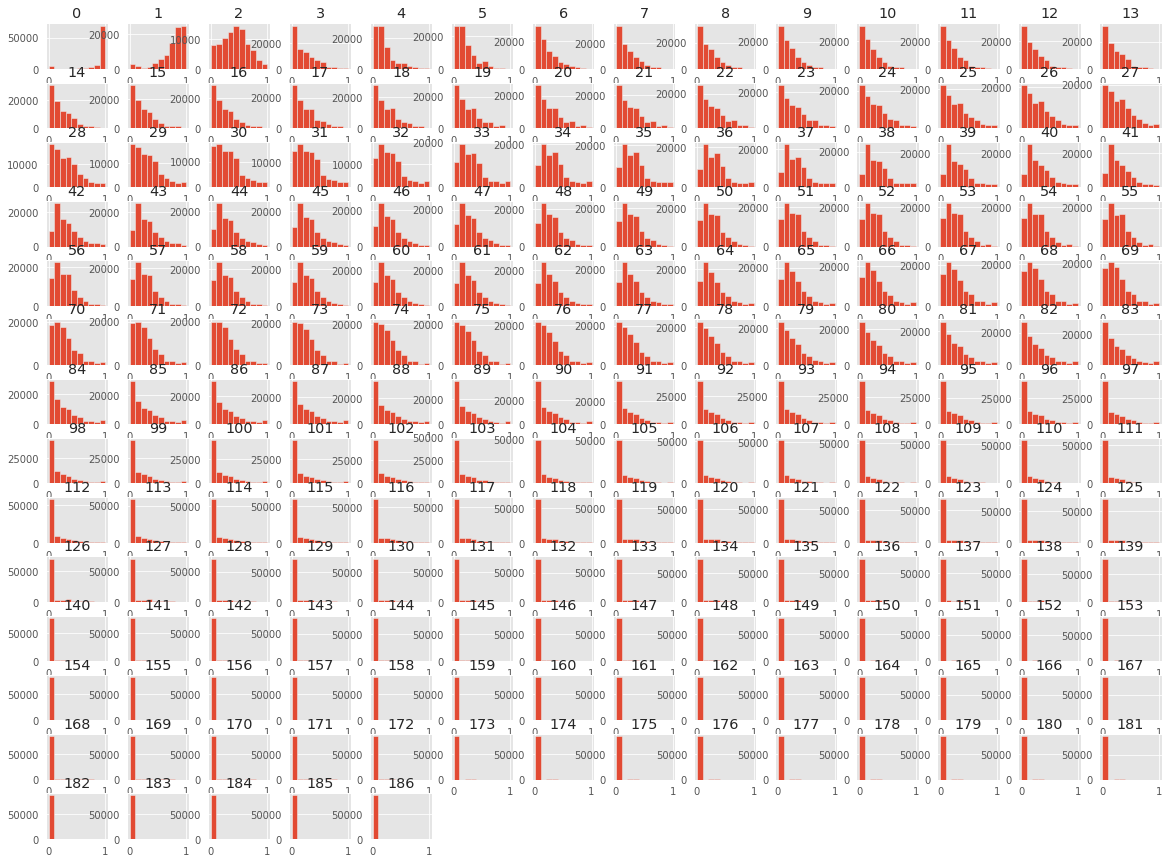

In [82]:
# ==================
# SANITY CHECK norm_Za
# ==================

# histogramme des Xi
%matplotlib inline
import matplotlib.pyplot as plt
norm_Za.hist(bins=10, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [83]:
# train standardised  + normalised = norm_Za

# moyenne norm_Za
print("moyenne des Xi",np.mean(norm_Za,axis=0))

# ecart-type norm_Za
print("ecart-type des Xi",np.std(norm_Za,axis=0,ddof=0))


moyenne des Xi 0      0.890360
1      0.758160
2      0.423972
3      0.219104
4      0.201127
5      0.210399
6      0.205808
7      0.201773
8      0.198691
9      0.196757
10     0.198778
11     0.203550
12     0.208776
13     0.212885
14     0.218393
15     0.224966
16     0.231377
17     0.237123
18     0.242582
19     0.247923
20     0.253749
21     0.259748
22     0.266244
23     0.272734
24     0.279355
25     0.285588
26     0.291808
27     0.297672
28     0.303384
29     0.308795
         ...   
157    0.022458
158    0.021809
159    0.021245
160    0.020623
161    0.020026
162    0.019534
163    0.019053
164    0.018592
165    0.017664
166    0.016740
167    0.015722
168    0.014402
169    0.013024
170    0.011625
171    0.010262
172    0.008929
173    0.008056
174    0.007278
175    0.006531
176    0.005981
177    0.005479
178    0.005025
179    0.004628
180    0.004291
181    0.003945
182    0.003681
183    0.003471
184    0.003221
185    0.002945
186    0.002807
Length: 1

Text(0.5, 1.0, 'distribution des mean des Xi_normalise')

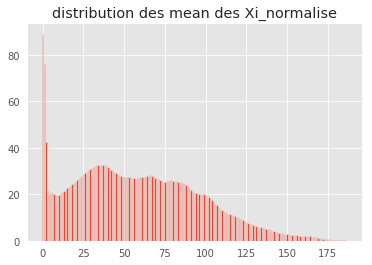

In [84]:
# moyenne norm_Za
x = [i + 0.01 for i, _ in enumerate(b)]
y = norm_Za.mean()*100
plt.bar(x,y)
plt.title("distribution des mean des Xi_normalise")

Text(0.5, 1.0, 'distribution des mean des Xi_normalise')

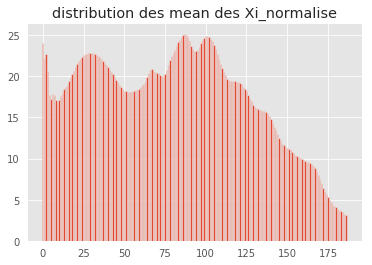

In [85]:
# ec norm_Za
x = [i + 0.01 for i, _ in enumerate(b)]
y = norm_Za.std()*100
plt.bar(x,y)
plt.title("distribution des mean des Xi_normalise")

#### test

In [86]:
from sklearn import preprocessing

# Get column names first
names = dfzb.columns

# Create the Scaler object
norm = preprocessing.MinMaxScaler()
#scaler = preprocessing.StandardScaler()
#n = preprocessing.PowerTransformer(method='box-cox', standardize=False)


# Fit your data on the scaler object
scaled_Zb = norm.fit_transform(dfzb)
#scaled_Za = n.fit_transform(dfza)

norm_Zb = pd.DataFrame(scaled_Zb, columns=names)
norm_Zb.head(5)

0         1         2         3         4         5         6    \
0  1.000000  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677   
1  1.000000  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972   
2  0.972840  0.728395  0.000000  0.037037  0.162963  0.143210  0.123457   
3  1.000000  0.694444  0.238095  0.321429  0.337302  0.337302  0.301587   
4  0.939815  0.791667  0.199074  0.000000  0.055556  0.101852  0.106481   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.142216  0.121605  0.108716  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.283747  0.276271  0.275085  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.140741  0.133715  0.097129  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.325397  0.326329  0.336215  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.143519  0.222859  0.191456  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 187 columns]

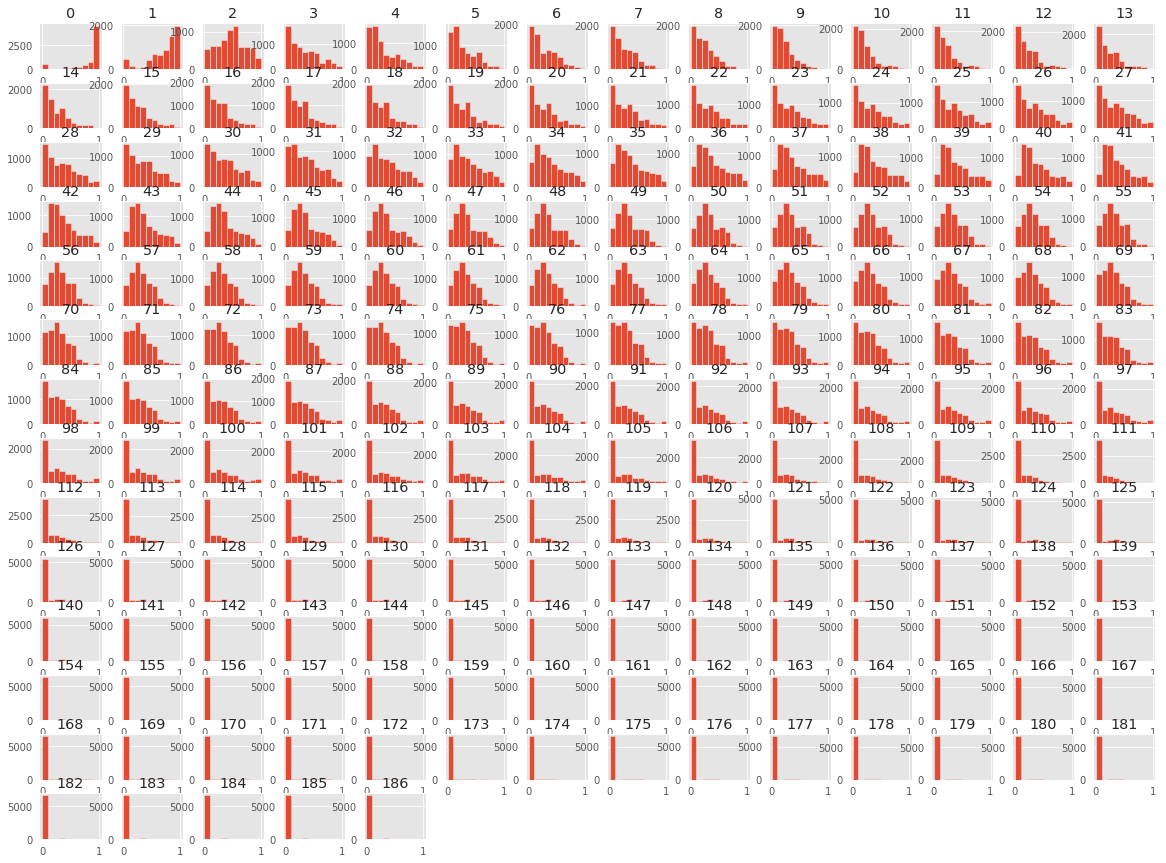

In [87]:
# ==================
# SANITY CHECK norm_Zb
# ==================

# histogramme des Xi
%matplotlib inline
import matplotlib.pyplot as plt
norm_Zb.hist(bins=10, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [88]:
# moyenne
print("moyenne des Xi",np.mean(norm_Zb,axis=0))

# ecart-type
print("ecart-type des Xi",np.std(norm_Zb,axis=0,ddof=0))

moyenne des Xi 0      0.840578
1      0.718833
2      0.475484
3      0.316535
4      0.284219
5      0.276256
6      0.262194
7      0.248167
8      0.232335
9      0.216732
10     0.210753
11     0.208204
12     0.221525
13     0.220028
14     0.242040
15     0.257225
16     0.266881
17     0.270958
18     0.272892
19     0.279321
20     0.286749
21     0.294262
22     0.301633
23     0.309789
24     0.317629
25     0.325195
26     0.332180
27     0.338902
28     0.345560
29     0.351870
         ...   
157    0.026590
158    0.026247
159    0.025382
160    0.024623
161    0.024211
162    0.023888
163    0.023443
164    0.022380
165    0.021230
166    0.020086
167    0.018786
168    0.018093
169    0.017387
170    0.016676
171    0.015768
172    0.014534
173    0.013740
174    0.012910
175    0.011669
176    0.011248
177    0.010475
178    0.009790
179    0.009079
180    0.008795
181    0.008070
182    0.007680
183    0.007481
184    0.006968
185    0.006731
186    0.006594
Length: 1

Text(0.5, 1.0, 'distribution des mean des Xi_normalise')

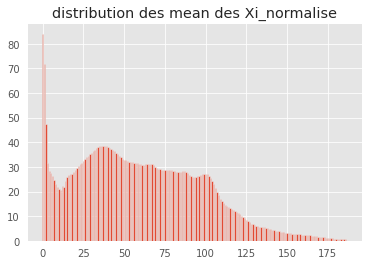

In [89]:
# moyenne norm_Zb
x = [i + 0.01 for i, _ in enumerate(b)]
y = norm_Zb.mean()*100
plt.bar(x,y)
plt.title("distribution des mean des Xi_normalise")

Text(0.5, 1.0, 'distribution des mean des Xi_normalise')

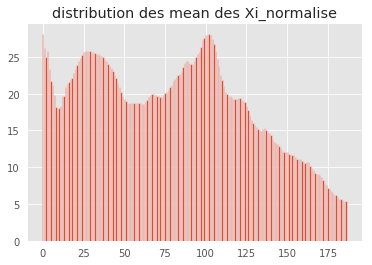

In [90]:
# ec norm_Zb
x = [i + 0.01 for i, _ in enumerate(b)]
y = norm_Zb.std()*100
plt.bar(x,y)
plt.title("distribution des mean des Xi_normalise")

### Tests shapiro-Wilks (apres normalisation)

#### train

In [91]:
t = norm_Za
type(t)

pandas.core.frame.DataFrame

In [92]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(t)
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics = 0.797, p = 0.000
Sample does not look Gaussian (reject H0)


/home/dlp/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [93]:
# ********************************************************************************************************
# conclusion = apres normalisation, test normalite non valide, les Xi ≠ N(mu,theta)
# ********************************************************************************************************

#### test

In [94]:
t = norm_Zb
type(t)

pandas.core.frame.DataFrame

In [95]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(t)
print('Statistics = %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics = 0.815, p = 0.000
Sample does not look Gaussian (reject H0)


/home/dlp/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/scipy/stats/morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Matrice des correlations

In [96]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [97]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html

#### train

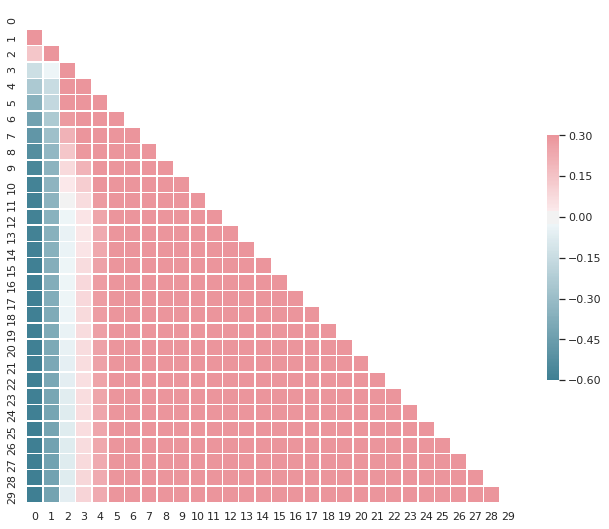

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

#d=dfza.iloc[:,0:30]
d = norm_Za.iloc[:,0:30]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [99]:
# on remarque que les features 0,1,2 sont correlees negativement avec les 184 autres Xi [totXi=187-31er-xi]

In [100]:
# refaire matrice des correlations entre les ecg_0 et les autres ecgs (aryhtmies cardiaques)

#### test

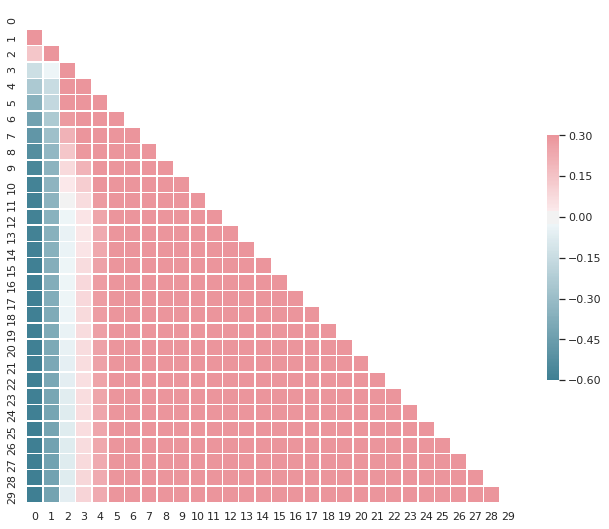

In [101]:
#d = dfzb.iloc[:,0:30]
d = norm_Za.iloc[:,0:30]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Detection des outliers

#### train

(i) methode 1 : oneClassSVM

In [102]:
#Y_label=mitbih_train.iloc[1:10000,187]
Y_label=mitbih_train.iloc[:,187]

#norm_Za = norm_Za.iloc[1:10000,]
norm_Za = norm_Za

In [103]:
import sklearn.svm as ssvm
OCS = ssvm.OneClassSVM(kernel="rbf", nu=0.05, gamma="auto")

In [104]:
OCS.fit(norm_Za)
pred = OCS.predict(norm_Za)

In [105]:
CT_svm = pd.DataFrame(list(zip(pred,Y_label)), columns=["pred","Anomaly"])
display(pd.crosstab(CT_svm.pred, CT_svm.Anomaly))

Anomaly    0.0   1.0   2.0  3.0   4.0
pred                                 
-1        3759   131   437   27    24
 1       68712  2092  5351  614  6407

In [106]:
# -1 = anomalies vs 1 = non anomalies

In [107]:
tot_lignes_a_anomaliesOCS=(3759+131+437+27+24)
tot_lignes_a_anomaliesOCS

4378

In [108]:
a=3759/(3759+68712);
b=131/(131+2092);
c=437/(437+5351)
d=27/(27+614)
e=24/(24+6407)

l=(a,b,c,d,e)

def ar(x):
    return (round(x,4))

for i in l:
    print(ar(i)*100, "%")

5.19 %
5.89 %
7.55 %
4.21 %
0.37 %


In [109]:
#mitbih_train
#mitbih_train.iloc[0:2,187]

In [110]:
#selectionner toutes les lignes Train dt label  = 3.0
print(mitbih_train.loc[mitbih_train['label']==3.0,:])

              0         1         2         3         4         5         6  \
80482  1.000000  0.899749  0.641604  0.314536  0.101504  0.107769  0.111529   
80483  0.732252  1.000000  0.983773  0.484787  0.178499  0.111562  0.081136   
80484  0.991984  1.000000  0.601202  0.280561  0.158317  0.146293  0.104208   
80485  0.778378  0.528378  0.258108  0.128378  0.000000  0.037838  0.167568   
80486  1.000000  0.914931  0.531250  0.303819  0.178819  0.157986  0.128472   
80487  1.000000  0.895778  0.633245  0.275726  0.087071  0.116095  0.100264   
80488  1.000000  0.924703  0.684280  0.384412  0.141347  0.113606  0.110964   
80489  0.902574  1.000000  0.939338  0.547794  0.250000  0.132353  0.108456   
80490  1.000000  0.939119  0.698187  0.353627  0.108808  0.113990  0.119171   
80491  0.964215  1.000000  0.827038  0.423459  0.248509  0.145129  0.125249   
80492  0.757143  1.000000  0.887500  0.396429  0.210714  0.167857  0.157143   
80493  1.000000  0.908529  0.647713  0.341162  0.129

In [111]:
#selectionner toutes les lignes Train dt label  = -1
print(CT_svm.loc[CT_svm['pred']==-1,:])

       pred  Anomaly
57       -1      0.0
60       -1      0.0
93       -1      0.0
112      -1      0.0
136      -1      0.0
150      -1      0.0
162      -1      0.0
194      -1      0.0
196      -1      0.0
217      -1      0.0
266      -1      0.0
268      -1      0.0
295      -1      0.0
309      -1      0.0
347      -1      0.0
388      -1      0.0
432      -1      0.0
441      -1      0.0
448      -1      0.0
502      -1      0.0
503      -1      0.0
555      -1      0.0
568      -1      0.0
584      -1      0.0
628      -1      0.0
633      -1      0.0
641      -1      0.0
669      -1      0.0
696      -1      0.0
701      -1      0.0
...     ...      ...
80922    -1      3.0
80959    -1      3.0
80986    -1      3.0
81069    -1      3.0
81098    -1      3.0
81109    -1      3.0
81391    -1      4.0
81618    -1      4.0
81693    -1      4.0
81718    -1      4.0
81830    -1      4.0
82024    -1      4.0
82173    -1      4.0
82213    -1      4.0
84129    -1      4.0
84301    -1  

In [112]:
# en valeur absolue
print(mitbih_train["label"].value_counts())

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: label, dtype: int64


In [113]:
# en valeur relative
print(mitbih_train["label"].value_counts()/len(mitbih_train)*100)

0.0    82.772917
4.0     7.345181
2.0     6.610777
1.0     2.539005
3.0     0.732120
Name: label, dtype: float64


In [114]:
anor=1-(len(mitbih_train.loc[mitbih_train['label']==0.0,:]))/len(mitbih_train)

In [115]:
anor=round(anor,4)
print("tx anormal =", anor*100,"%")

tx anormal = 17.23 %


(ii) methode 2 : Local Outlier Factor

In [116]:
import sklearn.neighbors as sn

contamination=0.05
metric = "euclidean"
n_neighbors = 15
clf = sn.LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, metric=metric)
y_pred = clf.fit_predict(norm_Za)

CT_metier_lof = pd.DataFrame(list(zip(y_pred,Y_label)), columns=["pred","Anomaly"])
display(pd.crosstab(CT_metier_lof.pred, CT_metier_lof.Anomaly))

Anomaly    0.0   1.0   2.0  3.0   4.0
pred                                 
-1        3387   266   390   55   280
 1       69084  1957  5398  586  6151

In [117]:
type(CT_metier_lof)

pandas.core.frame.DataFrame

In [118]:
CT_metier_lof.head(10)

pred  Anomaly
0     1      0.0
1     1      0.0
2     1      0.0
3    -1      0.0
4     1      0.0
5     1      0.0
6     1      0.0
7     1      0.0
8     1      0.0
9     1      0.0

In [119]:
tot_lignes_a_anomaliesLOF=(3387+266+390+55+280)
tot_lignes_a_anomaliesLOF

4378

In [120]:
a=3387/(3387+69084);
b=266/(266+1957);
c=390/(390+5398)
d=55/(55+586)
e=280/(280+6151)

l=(a,b,c,d,e)

def ar(x):
    return (round(x,4))

for i in l:
    print(ar(i)*100, "%")

4.67 %
11.97 %
6.74 %
8.58 %
4.35 %


In [121]:
# analyse: sur les signaux brutes, 
# la methode Local Outlier Factor semble etre plus performant que OneClassSVM,
# elle detecte moins de faux positifs sur les signaux Normaux et Plus sur les signaux en arythmies.

In [122]:
#selectionner toutes les lignes Train dt label  = -1
print(CT_metier_lof.loc[CT_metier_lof['pred']==-1,:])

       pred  Anomaly
3        -1      0.0
81       -1      0.0
100      -1      0.0
112      -1      0.0
128      -1      0.0
129      -1      0.0
197      -1      0.0
203      -1      0.0
214      -1      0.0
217      -1      0.0
248      -1      0.0
254      -1      0.0
298      -1      0.0
300      -1      0.0
307      -1      0.0
336      -1      0.0
342      -1      0.0
345      -1      0.0
357      -1      0.0
418      -1      0.0
445      -1      0.0
502      -1      0.0
503      -1      0.0
537      -1      0.0
550      -1      0.0
571      -1      0.0
588      -1      0.0
590      -1      0.0
609      -1      0.0
625      -1      0.0
...     ...      ...
86827    -1      4.0
86844    -1      4.0
86847    -1      4.0
86854    -1      4.0
86857    -1      4.0
86900    -1      4.0
86942    -1      4.0
86963    -1      4.0
86968    -1      4.0
86980    -1      4.0
87001    -1      4.0
87023    -1      4.0
87040    -1      4.0
87091    -1      4.0
87104    -1      4.0
87132    -1  

In [123]:
# toutes les lignes norm_ZA sans presence d outliers
#print(CT_metier_lof.loc[CT_metier_lof['pred']==1,:])
norm_ZA_LOF=CT_metier_lof.loc[CT_metier_lof['pred']==1,:]
norm_ZA_LOF_index = norm_ZA_LOF.index

In [124]:
print(norm_ZA_LOF_index)

Int64Index([    0,     1,     2,     4,     5,     6,     7,     8,     9,
               10,
            ...
            87544, 87545, 87546, 87547, 87548, 87549, 87550, 87551, 87552,
            87553],
           dtype='int64', length=83176)


In [125]:
norm_ZA_LOF.head(100)

pred  Anomaly
0       1      0.0
1       1      0.0
2       1      0.0
4       1      0.0
5       1      0.0
6       1      0.0
7       1      0.0
8       1      0.0
9       1      0.0
10      1      0.0
11      1      0.0
12      1      0.0
13      1      0.0
14      1      0.0
15      1      0.0
16      1      0.0
17      1      0.0
18      1      0.0
19      1      0.0
20      1      0.0
21      1      0.0
22      1      0.0
23      1      0.0
24      1      0.0
25      1      0.0
26      1      0.0
27      1      0.0
28      1      0.0
29      1      0.0
30      1      0.0
..    ...      ...
71      1      0.0
72      1      0.0
73      1      0.0
74      1      0.0
75      1      0.0
76      1      0.0
77      1      0.0
78      1      0.0
79      1      0.0
80      1      0.0
82      1      0.0
83      1      0.0
84      1      0.0
85      1      0.0
86      1      0.0
87      1      0.0
88      1      0.0
89      1      0.0
90      1      0.0
91      1      0.0
92      1      0.0
93      1      0.0
94      1      0.0
95      1      0.0
96      1      0.0
97      1      0.0
98      1      0.0
99      1      0.0
101     1      0.0
102     1      0.0

[100 rows x 2 columns]

In [126]:
# sanity check
len(CT_metier_lof.loc[CT_metier_lof['pred']==-1,:])-(len(norm_Za)-len(norm_ZA_LOF_index))

0

In [127]:
norm_Za.head(5)

0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 187 columns]

In [128]:
# https://www.supinfo.com/articles/single/3140-manipulation-donnees-python
# newdf = pandas.concat([df,tauxnet],axis=1)

# concat df norm_Za + 
norm_Za_filtre = pd.concat([norm_Za,norm_ZA_LOF], axis=1)
norm_Za_filtre.head(2)

norm_Za_filtree = norm_Za_filtre.iloc[:,0:188]
norm_Za_filtree.head(2)

Y_label=mitbih_train.iloc[:,187]

norm_Za_filtree_label = pd.concat([norm_Za_filtree,Y_label], axis=1)
norm_Za_filtree_label.head(2)

0         1         2         3         4         5         6  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

          7         8         9  ...  179  180  181  182  183  184  185  186  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   pred  label  
0   1.0    0.0  
1   1.0    0.0  

[2 rows x 189 columns]

In [129]:
# sanity check
norm_Za_filtree_label.shape

(87554, 189)

In [130]:
# train norm_Za filtre sur lignes sans outliers
#print(mitbih_train.loc[mitbih_train['label']==3.0,:])

#print(norm_Za_filtree_label.loc[norm_Za_filtree_label['pred']==1.0,:])
norm_Za_Fi_label=norm_Za_filtree_label.loc[norm_Za_filtree_label['pred']==1.0,:]
norm_Za_Fi_label.head(2)

0         1         2         3         4         5         6  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

          7         8         9  ...  179  180  181  182  183  184  185  186  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   pred  label  
0   1.0    0.0  
1   1.0    0.0  

[2 rows x 189 columns]

In [131]:
# sanity check
norm_Za_Fi_label.shape

(83176, 189)

In [132]:
# ============================================================
# DATASET TRAIN - STANDARDISED - NORMALISED - WITHOUT OUTLIERS
# ============================================================

# supprimer la colonne pred
norm_Zafi = norm_Za_Fi_label.drop('pred', 1)
norm_Zafi.head(2)

0         1         2         3         4         5         6  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

          7         8         9  ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  label  
0  0.0    0.0  
1  0.0    0.0  

[2 rows x 188 columns]

In [133]:
# sanity check
norm_Zafi.shape

(83176, 188)

In [134]:
# sanity check repartition des labels
# en valeur absolue
print(norm_Zafi["label"].value_counts())

0.0    69084
4.0     6151
2.0     5398
1.0     1957
3.0      586
Name: label, dtype: int64


In [135]:
# sanity check repartition des labels
# en valeur relative
print(norm_Zafi["label"].value_counts()/len(norm_Zafi)*100)

0.0    83.057613
4.0     7.395162
2.0     6.489853
1.0     2.352842
3.0     0.704530
Name: label, dtype: float64


In [136]:
round((100-83.0576130),4)

16.9424

#### test [outliers todo]

(i) methode 1 : oneClassSVM

In [137]:
norm_Zb.head(5)

0         1         2         3         4         5         6    \
0  1.000000  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677   
1  1.000000  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972   
2  0.972840  0.728395  0.000000  0.037037  0.162963  0.143210  0.123457   
3  1.000000  0.694444  0.238095  0.321429  0.337302  0.337302  0.301587   
4  0.939815  0.791667  0.199074  0.000000  0.055556  0.101852  0.106481   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.142216  0.121605  0.108716  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.283747  0.276271  0.275085  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.140741  0.133715  0.097129  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.325397  0.326329  0.336215  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.143519  0.222859  0.191456  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 187 columns]

In [138]:
mitbih_test.head(5)

0         1         2         3         4         5         6  \
0  1.000000  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677   
1  1.000000  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972   
2  0.972840  0.728395  0.000000  0.037037  0.162963  0.143210  0.123457   
3  1.000000  0.694444  0.238095  0.321429  0.337302  0.337302  0.301587   
4  0.939815  0.791667  0.199074  0.000000  0.055556  0.101852  0.106481   

          7         8         9  ...  178  179  180  181  182  183  184  185  \
0  0.142216  0.121257  0.107784  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.283747  0.275482  0.272727  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.140741  0.133333  0.096296  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.325397  0.325397  0.333333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.143519  0.222222  0.189815  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  label  
0  0.0    1.0  
1  0.0    1.0  
2  0.0    1.0  
3  0.0    1.0  
4  0.0    1.0  

[5 rows x 188 columns]

In [139]:
#Y_label pour mitbih_test
Y_labelt=mitbih_test.iloc[:,187]

# sanity check
Y_labelt.shape

(6774,)

In [140]:
# sanity check
print(Y_labelt.value_counts()/len(Y_labelt)*100)

0.0    44.286980
4.0    23.737821
2.0    21.375849
1.0     8.207854
3.0     2.391497
Name: label, dtype: float64


In [141]:
import sklearn.svm as ssvm
OCS = ssvm.OneClassSVM(kernel="rbf", nu=0.05, gamma="auto")

In [142]:
OCS.fit(norm_Za)
predt = OCS.predict(norm_Zb)

In [143]:
CT_svmt = pd.DataFrame(list(zip(predt,Y_labelt)), columns=["pred","Anomaly"])
display(pd.crosstab(CT_svmt.pred, CT_svmt.Anomaly))

Anomaly   0.0  1.0   2.0  3.0   4.0
pred                               
-1        163   39   122    8     6
 1       2837  517  1326  154  1602

In [144]:
# -1 = anomalies vs 1 = non anomalies

In [145]:
tot_lignes_a_anomaliesOCS=(943+39+119+8+6)
tot_lignes_a_anomaliesOCS

1115

In [146]:
tot_lignes_a_sansanomaliesOCS=(17175+517+1329+154+1602)
tot_lignes_a_sansanomaliesOCS

20777

In [147]:
# sanity check
tot_lignes_a_anomaliesOCS+tot_lignes_a_sansanomaliesOCS

21892

In [148]:
#poids des anomalies dans total
pds=(tot_lignes_a_anomaliesOCS/(tot_lignes_a_anomaliesOCS+tot_lignes_a_sansanomaliesOCS))*100
round(pds,4)

5.0932

In [149]:
a=943/(943+17175);
b=39/(39+517);
c=119/(119+1329)
d=8/(8+154)
e=6/(6+1602)

l=(a,b,c,d,e)

def ar(x):
    return (round(x,4))

for i in l:
    print(round((ar(i)*100),2), "%")

5.2 %
7.01 %
8.22 %
4.94 %
0.37 %


In [150]:
#selectionner toutes les lignes Train dt label  = 3.0
print(mitbih_test.loc[mitbih_test['label']==3.0,:])

             0         1         2         3         4         5         6  \
2004  0.868114  1.000000  0.781302  0.355593  0.207012  0.176962  0.145242   
2005  1.000000  0.768025  0.420063  0.158307  0.000000  0.067398  0.137931   
2006  0.338858  0.478821  0.532228  0.523020  0.552486  0.666667  0.723757   
2007  1.000000  0.986641  0.654580  0.353053  0.230916  0.156489  0.137405   
2008  0.840909  0.926136  1.000000  0.973485  0.571970  0.289773  0.132576   
2009  1.000000  0.971429  0.790062  0.419876  0.110559  0.098137  0.111801   
2010  0.914019  0.983178  1.000000  0.644860  0.336449  0.194393  0.151402   
2011  1.000000  0.917419  0.680000  0.361290  0.127742  0.129032  0.126452   
2012  1.000000  0.900794  0.462302  0.208333  0.170635  0.156746  0.146825   
2013  0.871324  0.966912  1.000000  0.637868  0.347426  0.180147  0.150735   
2014  1.000000  0.751067  0.442390  0.176387  0.103841  0.130868  0.099573   
2015  1.000000  0.852399  0.372694  0.261993  0.195572  0.125461

In [151]:
#selectionner toutes les lignes Train dt label  = -1
print(CT_svmt.loc[CT_svmt['pred']==-1,:])

      pred  Anomaly
8       -1      1.0
18      -1      1.0
21      -1      1.0
33      -1      1.0
39      -1      1.0
42      -1      1.0
62      -1      1.0
86      -1      1.0
93      -1      1.0
123     -1      1.0
161     -1      1.0
177     -1      1.0
218     -1      1.0
223     -1      1.0
244     -1      1.0
245     -1      1.0
249     -1      1.0
269     -1      1.0
277     -1      1.0
304     -1      1.0
311     -1      1.0
335     -1      1.0
351     -1      1.0
362     -1      1.0
405     -1      1.0
453     -1      1.0
481     -1      1.0
496     -1      1.0
500     -1      1.0
505     -1      1.0
...    ...      ...
6244    -1      0.0
6300    -1      0.0
6386    -1      0.0
6388    -1      0.0
6391    -1      0.0
6392    -1      0.0
6437    -1      0.0
6457    -1      0.0
6482    -1      0.0
6506    -1      0.0
6521    -1      0.0
6533    -1      0.0
6535    -1      0.0
6543    -1      0.0
6545    -1      0.0
6584    -1      0.0
6605    -1      0.0
6633    -1      0.0


In [152]:
anor=1-(len(mitbih_test.loc[mitbih_test['label']==0.0,:]))/len(mitbih_test)

In [153]:
anor=round(anor,4)
print("tx anormal =", anor*100,"%")

tx anormal = 55.71 %


(ii) methode 2 : Local Outlier Factor

In [154]:
import sklearn.neighbors as sn

contamination=0.05
metric = "euclidean"
n_neighbors = 15
clf = sn.LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, metric=metric)
y_predt = clf.fit_predict(norm_Zb)

CT_metier_lof = pd.DataFrame(list(zip(y_predt,Y_labelt)), columns=["pred","Anomaly"])
display(pd.crosstab(CT_metier_lof.pred, CT_metier_lof.Anomaly))

Anomaly   0.0  1.0   2.0  3.0   4.0
pred                               
-1        126   46    95    1    71
 1       2874  510  1353  161  1537

In [155]:
type(CT_metier_lof)

pandas.core.frame.DataFrame

In [156]:
CT_metier_lof.head(2)

pred  Anomaly
0     1      1.0
1     1      1.0

In [157]:
tot_lignes_a_anomaliesLOF=(834+60+114+10+77)
tot_lignes_a_anomaliesLOF

1095

In [158]:
tot_lignes_a_sansanomaliesLOF=(17284+496+1334+152+1531)
tot_lignes_a_sansanomaliesLOF

20797

In [159]:
# sanity check
tot_lignes_a_anomaliesLOF+tot_lignes_a_sansanomaliesLOF

21892

In [160]:
#poids des anomalies dans total
pds=(tot_lignes_a_anomaliesLOF/(tot_lignes_a_anomaliesLOF+tot_lignes_a_sansanomaliesLOF))*100
round(pds,4)

5.0018

In [161]:
a=834/(834+17284);
b=60/(60+496);
c=114/(114+1334)
d=10/(10+152)
e=77/(77+1531)

l=(a,b,c,d,e)

def ar(x):
    return (round(x,4))

for i in l:
    print(round((ar(i)*100),2), "%")

4.6 %
10.79 %
7.87 %
6.17 %
4.79 %


In [162]:
# analyse: sur les signaux brutes, 
# la methode Local Outlier Factor semble etre plus performant que OneClassSVM,
# elle detecte moins de faux positifs sur les signaux Normaux et Plus sur les signaux en arythmies.

In [163]:
#selectionner toutes les lignes Train dt label  = -1
print(CT_metier_lof.loc[CT_metier_lof['pred']==-1,:])

      pred  Anomaly
43      -1      1.0
47      -1      1.0
67      -1      1.0
73      -1      1.0
78      -1      1.0
80      -1      1.0
108     -1      1.0
113     -1      1.0
132     -1      1.0
148     -1      1.0
165     -1      1.0
167     -1      1.0
177     -1      1.0
194     -1      1.0
212     -1      1.0
216     -1      1.0
244     -1      1.0
249     -1      1.0
260     -1      1.0
263     -1      1.0
269     -1      1.0
280     -1      1.0
281     -1      1.0
291     -1      1.0
299     -1      1.0
300     -1      1.0
308     -1      1.0
310     -1      1.0
330     -1      1.0
347     -1      1.0
...    ...      ...
5997    -1      0.0
6000    -1      0.0
6026    -1      0.0
6051    -1      0.0
6128    -1      0.0
6177    -1      0.0
6179    -1      0.0
6269    -1      0.0
6313    -1      0.0
6349    -1      0.0
6376    -1      0.0
6405    -1      0.0
6432    -1      0.0
6454    -1      0.0
6488    -1      0.0
6504    -1      0.0
6522    -1      0.0
6542    -1      0.0


In [164]:
# toutes les lignes norm_ZA sans presence d outliers
#print(CT_metier_lof.loc[CT_metier_lof['pred']==1,:])
norm_Zb_LOF=CT_metier_lof.loc[CT_metier_lof['pred']==1,:]
norm_Zb_LOF_index = norm_Zb_LOF.index

In [165]:
print(norm_Zb_LOF_index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6764, 6765, 6766, 6767, 6768, 6769, 6770, 6771, 6772, 6773],
           dtype='int64', length=6435)


In [166]:
norm_Zb_LOF.head(100)

pred  Anomaly
0       1      1.0
1       1      1.0
2       1      1.0
3       1      1.0
4       1      1.0
5       1      1.0
6       1      1.0
7       1      1.0
8       1      1.0
9       1      1.0
10      1      1.0
11      1      1.0
12      1      1.0
13      1      1.0
14      1      1.0
15      1      1.0
16      1      1.0
17      1      1.0
18      1      1.0
19      1      1.0
20      1      1.0
21      1      1.0
22      1      1.0
23      1      1.0
24      1      1.0
25      1      1.0
26      1      1.0
27      1      1.0
28      1      1.0
29      1      1.0
..    ...      ...
74      1      1.0
75      1      1.0
76      1      1.0
77      1      1.0
79      1      1.0
81      1      1.0
82      1      1.0
83      1      1.0
84      1      1.0
85      1      1.0
86      1      1.0
87      1      1.0
88      1      1.0
89      1      1.0
90      1      1.0
91      1      1.0
92      1      1.0
93      1      1.0
94      1      1.0
95      1      1.0
96      1      1.0
97      1      1.0
98      1      1.0
99      1      1.0
100     1      1.0
101     1      1.0
102     1      1.0
103     1      1.0
104     1      1.0
105     1      1.0

[100 rows x 2 columns]

In [167]:
# sanity check
len(CT_metier_lof.loc[CT_metier_lof['pred']==-1,:])-(len(norm_Zb)-len(norm_Zb_LOF_index))

0

In [168]:
norm_Zb.head(5)

0         1         2         3         4         5         6    \
0  1.000000  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677   
1  1.000000  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972   
2  0.972840  0.728395  0.000000  0.037037  0.162963  0.143210  0.123457   
3  1.000000  0.694444  0.238095  0.321429  0.337302  0.337302  0.301587   
4  0.939815  0.791667  0.199074  0.000000  0.055556  0.101852  0.106481   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.142216  0.121605  0.108716  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.283747  0.276271  0.275085  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.140741  0.133715  0.097129  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.325397  0.326329  0.336215  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.143519  0.222859  0.191456  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 187 columns]

In [169]:
# https://www.supinfo.com/articles/single/3140-manipulation-donnees-python
# newdf = pandas.concat([df,tauxnet],axis=1)

# concat df norm_Zb + 
norm_Zb_filtre = pd.concat([norm_Zb,norm_Zb_LOF], axis=1)
norm_Zb_filtre.head(2)

norm_Zb_filtree = norm_Zb_filtre.iloc[:,0:188]
norm_Zb_filtree.head(2)

Y_labelt=mitbih_test.iloc[:,187]

norm_Zb_filtree_label = pd.concat([norm_Zb_filtree,Y_labelt], axis=1)
norm_Zb_filtree_label.head(2)

0         1         2         3         4         5         6         7  \
0  1.0  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677  0.142216   
1  1.0  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972  0.283747   

          8         9  ...  179  180  181  182  183  184  185  186  pred  \
0  0.121605  0.108716  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   
1  0.276271  0.275085  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   

   label  
0    1.0  
1    1.0  

[2 rows x 189 columns]

In [170]:
# sanity check
norm_Zb_filtree_label.shape

(6774, 189)

In [171]:
# train norm_Zb filtre sur lignes sans outliers
#print(mitbih_train.loc[mitbih_train['label']==3.0,:])

#print(norm_Za_filtree_label.loc[norm_Za_filtree_label['pred']==1.0,:])
norm_Zb_Fi_label=norm_Zb_filtree_label.loc[norm_Zb_filtree_label['pred']==1.0,:]
norm_Zb_Fi_label.head(2)

0         1         2         3         4         5         6         7  \
0  1.0  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677  0.142216   
1  1.0  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972  0.283747   

          8         9  ...  179  180  181  182  183  184  185  186  pred  \
0  0.121605  0.108716  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   
1  0.276271  0.275085  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   

   label  
0    1.0  
1    1.0  

[2 rows x 189 columns]

In [172]:
# sanity check
norm_Zb_Fi_label.shape

(6435, 189)

In [173]:
# ============================================================
# DATASET TRAIN - STANDARDISED - NORMALISED - WITHOUT OUTLIERS
# ============================================================

# supprimer la colonne pred
norm_Zbfi = norm_Zb_Fi_label.drop('pred', 1)
norm_Zbfi.head(2)

0         1         2         3         4         5         6         7  \
0  1.0  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677  0.142216   
1  1.0  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972  0.283747   

          8         9  ...  178  179  180  181  182  183  184  185  186  label  
0  0.121605  0.108716  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0  
1  0.276271  0.275085  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0  

[2 rows x 188 columns]

In [174]:
# sanity check
norm_Zbfi.shape

(6435, 188)

In [175]:
# sanity check repartition des labels
# en valeur absolue
print(norm_Zbfi["label"].value_counts())

0.0    2874
4.0    1537
2.0    1353
1.0     510
3.0     161
Name: label, dtype: int64


In [176]:
# sanity check repartition des labels
# en valeur relative
print(norm_Zbfi["label"].value_counts()/len(norm_Zbfi)*100)

0.0    44.662005
4.0    23.885004
2.0    21.025641
1.0     7.925408
3.0     2.501943
Name: label, dtype: float64


In [177]:
# sanity check

In [178]:
print(round((100-83.108141),4),"%")

16.8919 %


In [179]:
# *************************

### Classifieur binaire : requilibrage de classes

#### train

(i) Etape1 : transformation PB classification de k = 5 classes en k = 2 classes

In [180]:
norm_Zafib=norm_Zafi
norm_Zafib.head(2)

0         1         2         3         4         5         6  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

          7         8         9  ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  label  
0  0.0    0.0  
1  0.0    0.0  

[2 rows x 188 columns]

In [181]:
norm_Zafib.shape

(83176, 188)

In [182]:
#code[df['sexe']=='masculin'] = 1
#code = pd.Series(np.zeros(norm_Zafib.shape[0]))
#code[norm_Zafib['label']==4.0] = 1.0
#code[norm_Zafib['label']=='2.0'] = 1.0
#code[norm_Zafib['label']=='3.0'] = 1.0

norm_Zafib.loc[norm_Zafib['label']==4.0,:]=1.0
norm_Zafib.loc[norm_Zafib['label']==2.0,:]=1.0
norm_Zafib.loc[norm_Zafib['label']==3.0,:]=1.0

In [183]:
# sanity check repartition des labels
# en valeur absolue
print(norm_Zafib["label"].value_counts())
sum(norm_Zafib["label"].value_counts())

0.0    69084
1.0    14092
Name: label, dtype: int64


83176

In [184]:
# sanity check repartition des labels
# en valeur relative
print(norm_Zafib["label"].value_counts()/len(norm_Zafib)*100)
sum(norm_Zafib["label"].value_counts()/len(norm_Zafib)*100)

0.0    83.057613
1.0    16.942387
Name: label, dtype: float64


100.0

In [185]:
# sanity check
#norm_Zafib.describe()

(ii) Etape2 : requilibrage poids des 2 classes (82.77,17.23) > (50.00;50.00)

In [186]:
# Etiquette
yb = norm_Zafib.iloc[:,187]
type(yb)

pandas.core.series.Series

In [187]:
# sanity check
#yb 
print(yb.value_counts()/len(yb)*100)

0.0    83.057613
1.0    16.942387
Name: label, dtype: float64


In [188]:
xb = norm_Zafib.iloc[:,0:187]
# sanity check
xb.head(2)

0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  

[2 rows x 187 columns]

In [189]:
xb.shape

(83176, 187)

In [190]:
#sanity check = ok
#xb.describe()

In [191]:
# library : imbalanced-learn is a python package
# -------------------------------------------------
# https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
# https://anaconda.org/conda-forge/imbalanced-learn

from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(xb, yb)
xr = X_resampled
yr = y_resampled


In [192]:
from collections import Counter
print(sorted(Counter(yr).items()))  

[(0.0, 69084), (1.0, 69084)]


In [193]:
# ===============================
# sanity check TRAIN Xi requilibre
# ===============================
xr.shape

(138168, 187)

In [194]:
xr = pd.DataFrame(xr)

In [195]:
type(xr)

pandas.core.frame.DataFrame

In [196]:
xr.head(2)

0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  

[2 rows x 187 columns]

In [197]:
# ===============================
# sanity check TRAIN Yi requilibre
# ===============================
yr.shape

(138168,)

In [198]:
yr = pd.DataFrame(yr)

In [199]:
type(yr)

pandas.core.frame.DataFrame

In [200]:
yr.head(2)

0
0  0.0
1  0.0

In [201]:
# https://code.i-harness.com/fr/q/ad216b
# reformatage du nom de colonne du dataframe
yr=yr.rename({0:'label'},axis=1)

In [202]:
# sanity check 
yr.head(5)

label
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0

In [203]:
# formater dataframe trainr
trainr = pd.concat([xr,yr], axis=1)

In [204]:
# ===============================
# sanity check TRAINr requilibre
# ===============================
trainr.shape

(138168, 188)

In [205]:
#trainr.head(100000)
trainr.head(2)

0         1         2         3         4         5         6  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   

          7         8         9  ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  label  
0  0.0    0.0  
1  0.0    0.0  

[2 rows x 188 columns]

#### test

(i) Etape1 : transformation PB classification de k = 5 classes en k = 2 classes

In [206]:
norm_Zbfib=norm_Zbfi
norm_Zbfib.head(2)

0         1         2         3         4         5         6         7  \
0  1.0  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677  0.142216   
1  1.0  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972  0.283747   

          8         9  ...  178  179  180  181  182  183  184  185  186  label  
0  0.121605  0.108716  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0  
1  0.276271  0.275085  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    1.0  

[2 rows x 188 columns]

In [207]:
norm_Zbfib.shape

(6435, 188)

In [208]:
#code[df['sexe']=='masculin'] = 1
#code = pd.Series(np.zeros(norm_Zafib.shape[0]))
#code[norm_Zafib['label']==4.0] = 1.0
#code[norm_Zafib['label']=='2.0'] = 1.0
#code[norm_Zafib['label']=='3.0'] = 1.0

norm_Zbfib.loc[norm_Zbfib['label']==4.0,:]=1.0
norm_Zbfib.loc[norm_Zbfib['label']==2.0,:]=1.0
norm_Zbfib.loc[norm_Zbfib['label']==3.0,:]=1.0

In [209]:
# sanity check repartition des labels
# en valeur absolue
print(norm_Zbfib["label"].value_counts())
sum(norm_Zbfib["label"].value_counts())

1.0    3561
0.0    2874
Name: label, dtype: int64


6435

In [210]:
# sanity check repartition des labels
# en valeur relative
print(norm_Zbfib["label"].value_counts()/len(norm_Zbfib)*100)
sum(norm_Zbfib["label"].value_counts()/len(norm_Zbfib)*100)

1.0    55.337995
0.0    44.662005
Name: label, dtype: float64


100.0

(ii) Etape2 : requilibrage poids des 2 classes (83.10,16.89) > (50.00;50.00)

In [211]:
# Etiquette
ybt = norm_Zbfib.iloc[:,187]
type(ybt)
ybt.shape

(6435,)

In [212]:
138168# sanity check
#ybt
print(ybt.value_counts()/len(ybt)*100)

1.0    55.337995
0.0    44.662005
Name: label, dtype: float64


In [213]:
xbt = norm_Zbfib.iloc[:,0:187]
# sanity check
xbt.head(2)

0         1         2         3         4         5         6         7    \
0  1.0  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677  0.142216   
1  1.0  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972  0.283747   

        8         9    ...  177  178  179  180  181  182  183  184  185  186  
0  0.121605  0.108716  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.276271  0.275085  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 187 columns]

In [214]:
xbt.shape

(6435, 187)

In [215]:
# library : imbalanced-learn is a python package
# -------------------------------------------------
# https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html
# https://anaconda.org/conda-forge/imbalanced-learn

from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(xbt, ybt)
xrt = X_resampled
yrt = y_resampled

In [216]:
from collections import Counter
print(sorted(Counter(yrt).items()))  

[(0.0, 3561), (1.0, 3561)]


In [217]:
# ===============================
# sanity check TEST Xi requilibre
# ===============================
xrt.shape

(7122, 187)

In [218]:
xrt = pd.DataFrame(xrt)

In [219]:
xrt.head(2)

0         1         2         3         4         5         6         7    \
0  1.0  0.758982  0.473054  0.193114  0.142216  0.176647  0.161677  0.142216   
1  1.0  0.746556  0.088154  0.035813  0.212121  0.253444  0.269972  0.283747   

        8         9    ...  177  178  179  180  181  182  183  184  185  186  
0  0.121605  0.108716  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.276271  0.275085  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 187 columns]

In [220]:
# ===============================
# sanity check TEST  Yi requilibre
# ===============================
yrt.shape

(7122,)

In [221]:
yrt = pd.DataFrame(yrt)

In [222]:
yrt.head(2)

0
0  1.0
1  1.0

In [223]:
# https://code.i-harness.com/fr/q/ad216b
# reformatage du nom de colonne du dataframe
yrt=yrt.rename({0:'label'},axis=1)

In [224]:
yrt.head(2)

label
0    1.0
1    1.0

In [225]:
# formater dataframe trainr
testr = pd.concat([xrt,yrt], axis=1)

In [226]:
# ===============================
# sanity check TRAINr requilibre
# ===============================
testr.shape

(7122, 188)

In [227]:
tps1=time.clock()
print("temps execution PREPROCESSING en mn = ", (tps1-tps00)/60)

temps execution PREPROCESSING en mn =  17.639233700000002


In [228]:
### STOP1 STOP1 - FIN PREPROCESSING

### classifieur multi-classes

In [229]:
# 5.24. sklearn.multiclass: Multiclass and multilabel classification 1795 p.

In [230]:
# one vs one
# one vs all

In [231]:
# *******************************************

#### classification binaire supervisee k = 2 et equilibree selon les poids des labels (0.5,0.5)

(i) Classe de classifieurs 1 : classifieurs du machine learning

In [232]:
#==================================
# https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/
# framework réutilisable pour la vérification ponctuelle d'algorithmes en Python
#==================================

In [233]:
#=========================================
# CODE PIPE MODELS PROCEDURE SPOT-CHECKING
#=========================================

# binary classification spot check script

import warnings
import time


from numpy import mean
from numpy import std
from matplotlib import pyplot

from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression          #1
from sklearn.linear_model import RidgeClassifier             #2   
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier #4
from sklearn.neighbors import KNeighborsClassifier           #5
from sklearn.tree import DecisionTreeClassifier              #6
from sklearn.tree import ExtraTreeClassifier                 #7
from sklearn.svm import SVC                                  #8
from sklearn.naive_bayes import GaussianNB                   #9
from sklearn.ensemble import AdaBoostClassifier              #10
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

tps0=time.clock()

# load the dataset, returns X and y elements
def load_dataset():
	return make_classification(n_samples=1000, n_classes=2, random_state=1)
	return sklearn.datasets.make_multilabel_classification(n_samples=1000,n_classes=2,n_labels=2,random_state=1)

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
    # linear models
	models['logistic'] = LogisticRegression()
	alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
	models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
	models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
	
    # non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
	models['cart'] = DecisionTreeClassifier()
	models['extra'] = ExtraTreeClassifier()
	models['svml'] = SVC(kernel='linear')
	models['svmp'] = SVC(kernel='poly')
	models['svmg'] = SVC(kernel='rbf')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVC(C=c)
	models['bayes'] = GaussianNB()
	
    # ensemble models
	n_trees = 100
	models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
	models['bag'] = BaggingClassifier(n_estimators=n_trees)
	models['rf'] = RandomForestClassifier(n_estimators=n_trees)
	models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
	models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	
    # standardization
	steps.append(('standardize', StandardScaler()))
	
    # normalization
	steps.append(('normalize', MinMaxScaler()))
	
    # the model
	steps.append(('model', model))
	
    # create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline 

# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	
    # create the pipeline
	pipeline = make_pipeline(model)
	
    # evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		
        # evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		
        # show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	
    # check for no results
	if len(results) == 0:
		print('no results')
		return
	
    # determine how many results to summarize
	n = min(top_n, len(results))
	
    # create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	
    # sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	
    # reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	
    # retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	
    # print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	
    # boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	pyplot.savefig('spotcheck.png')

In [234]:
138168/2

69084.0

In [235]:
#================== 
# tirer un échantillon aléatoire simple selon une distribution uniforme
#================== 
# https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor2-python-pandas.pdf

#==================
# train DATA
#==================

# pour les données ecg:
# N = 138168  #87554 # taille du fichier
# n = (600) # taille de l’échantillon
# lin2skipe=[1] # lire la première ligne
# ne pas lire N-n lignes tirées aléatoirement
# sampler = lin2skipe.extend(np.random.choice(np.arange(1,N),(N-n),replace=False))

##sampler = np.random.randint(0, len(trainr), size=138168)
sampler = np.random.randint(0, len(trainr), size=34000)
##sampler = np.random.randint(0, len(trainr), size = 4000)


#df_small = pd.read_csv("mitbih_train.csv.zip", skiprows=lin2skipe, header=None, names=Colnames)
df_small = trainr.take(sampler)

#print(df_small)

In [236]:
# sanity check
df_small.shape

(34000, 188)

In [237]:
# sanity check
#df_small.head(10)

Defined 54 models
>logistic: 0.971 (+/-0.003)
>ridge-0.1: 0.970 (+/-0.002)
>ridge-0.2: 0.970 (+/-0.002)
>ridge-0.3: 0.970 (+/-0.002)
>ridge-0.4: 0.970 (+/-0.002)
>ridge-0.5: 0.970 (+/-0.002)
>ridge-0.6: 0.970 (+/-0.002)
>ridge-0.7: 0.970 (+/-0.002)
>ridge-0.8: 0.970 (+/-0.003)
>ridge-0.9: 0.970 (+/-0.003)
>ridge-1.0: 0.970 (+/-0.003)
>sgd: 0.969 (+/-0.003)
>pa: 0.940 (+/-0.009)
>knn-1: 0.991 (+/-0.002)
>knn-2: 0.991 (+/-0.002)
>knn-3: 0.988 (+/-0.003)
>knn-4: 0.987 (+/-0.003)
>knn-5: 0.985 (+/-0.003)
>knn-6: 0.986 (+/-0.003)
>knn-7: 0.984 (+/-0.003)
>knn-8: 0.984 (+/-0.003)
>knn-9: 0.983 (+/-0.003)
>knn-10: 0.982 (+/-0.003)
>knn-11: 0.982 (+/-0.003)
>knn-12: 0.981 (+/-0.003)
>knn-13: 0.980 (+/-0.003)
>knn-14: 0.980 (+/-0.003)
>knn-15: 0.980 (+/-0.003)
>knn-16: 0.980 (+/-0.002)
>knn-17: 0.979 (+/-0.002)
>knn-18: 0.979 (+/-0.002)
>knn-19: 0.979 (+/-0.002)
>knn-20: 0.979 (+/-0.002)
>cart: 0.981 (+/-0.002)
>extra: 0.980 (+/-0.002)
>svml: 0.972 (+/-0.002)
>svmp: 0.930 (+/-0.004)
>svmg: 0.96

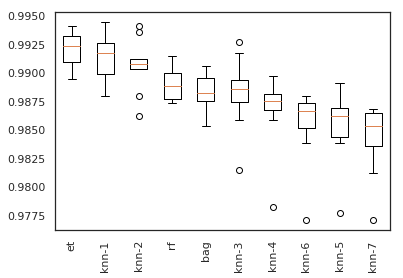

In [238]:
# load dataset
#X, y = load_dataset()

tps0=time.clock()


Xa=df_small.values[:,:-1]
ya=df_small.values[:,-1]


# get model list
models = define_models()

# evaluate models
results = evaluate_models(Xa, ya, models)

# summarize results
summarize_results(results)

tps1=time.clock()
print("temps execution en mn = ", (tps1-tps0)/60)

In [239]:
type(Xa)

numpy.ndarray

In [240]:
type(ya)

numpy.ndarray

In [241]:
#==================
# train TEST
#==================


sampler = np.random.randint(0, len(testr), size = 34000)
##sampler = np.random.randint(0, len(testr), size = 4000)

#df_small = pd.read_csv("mitbih_train.csv.zip", skiprows=lin2skipe, header=None, names=Colnames)
df_smallt = testr.take(sampler)


Defined 54 models
>logistic: 0.967 (+/-0.002)
>ridge-0.1: 0.967 (+/-0.002)
>ridge-0.2: 0.967 (+/-0.002)
>ridge-0.3: 0.967 (+/-0.002)
>ridge-0.4: 0.967 (+/-0.002)
>ridge-0.5: 0.967 (+/-0.002)
>ridge-0.6: 0.967 (+/-0.002)
>ridge-0.7: 0.967 (+/-0.002)
>ridge-0.8: 0.967 (+/-0.002)
>ridge-0.9: 0.967 (+/-0.002)
>ridge-1.0: 0.967 (+/-0.002)
>sgd: 0.968 (+/-0.003)
>pa: 0.949 (+/-0.010)
>knn-1: 1.000 (+/-0.000)
>knn-2: 0.999 (+/-0.001)
>knn-3: 0.998 (+/-0.001)
>knn-4: 0.996 (+/-0.001)
>knn-5: 0.995 (+/-0.001)
>knn-6: 0.991 (+/-0.002)
>knn-7: 0.990 (+/-0.002)
>knn-8: 0.986 (+/-0.002)
>knn-9: 0.985 (+/-0.002)
>knn-10: 0.982 (+/-0.002)
>knn-11: 0.982 (+/-0.002)
>knn-12: 0.980 (+/-0.002)
>knn-13: 0.980 (+/-0.002)
>knn-14: 0.979 (+/-0.002)
>knn-15: 0.978 (+/-0.002)
>knn-16: 0.977 (+/-0.002)
>knn-17: 0.978 (+/-0.002)
>knn-18: 0.977 (+/-0.002)
>knn-19: 0.977 (+/-0.002)
>knn-20: 0.977 (+/-0.002)
>cart: 0.999 (+/-0.001)
>extra: 0.999 (+/-0.001)
>svml: 0.969 (+/-0.002)
>svmp: 0.927 (+/-0.004)
>svmg: 0.95

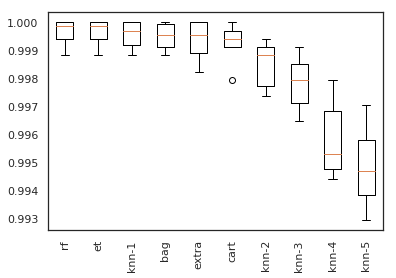

In [242]:
# load dataset
#X, y = load_dataset()

tps0=time.clock()

Xt=df_smallt.values[:,:-1]
yt=df_smallt.values[:,-1]


# get model list
models = define_models()
# evaluate models
results = evaluate_models(Xt, yt, models)


# summarize results
summarize_results(results)

tps1=time.clock()
print("temps execution en mn = ", (tps1-tps0)/60)

In [243]:
# *********************************************************************************************
# SPOT-CHECKING results : size = 34000 max - in memory (tient en ram)
# classifieur retenu    : Rank1 = classifier ExtrasTrees => accurracy_mean  = 0.992 et accuracy_std = 0.002
# *********************************************************************************************

In [244]:
# source ERT : Extremely randomized trees
# http://www.montefiore.ulg.ac.be/~ernst/uploads/news/id63/extremely-randomized-trees.pdf

In [245]:
# --------------------------------
# ANALYSE classifier ExtrasTrees : 
# --------------------------------

# Extra arbres = Ramdom Forest mais avec FAIBLE VARIANCE

# ExtraTrees : construit plusieurs arbres avec bootstrap = False par défaut, 
# ce qui signifie qu’il échantillonne sans remplacement, (= no baaging)

# les nœuds sont divisés en fonction de divisions aléatoires parmi un sous - ensemble aléatoire
# des entités sélectionnées sur chaque nœud

# Les ERT n'utilisent pas le «meilleur partage».

# Comme une RF, ERT sélectionne un sous-ensemble aléatoire de prédicteurs pour chaque division. 
# (R-paramètre de réglage: mtry)

# Au lieu du «meilleur fractionnement» pour les prédicteurs, ERT crée un petit nombre de points 
# de fractionnement choisis au hasard pour chacun des prédicteurs sélectionnés. 
# Dans le procédé original, cette valeur est de 1. (A paramètre de réglage: numRandomCuts)

# ERT sélectionne ensuite le «meilleur fractionnement» parmi ce petit nombre de choix.

# Dans Extra Trees, le caractère aléatoire ne provient pas de l'initialisation de données, 
# mais de la division aléatoire de toutes les observations.

In [246]:
## STOP2 STOP2

(i).1. validation simple :


In [247]:
# --------------------
# ExtraTreesClassifier avec validation simple Train vs Test
# --------------------

Xa=df_small.values[:,:-1]
ya=df_small.values[:,-1]

Xt=df_smallt.values[:,:-1]
yt=df_smallt.values[:,-1]

# Mélange le jeu de données
from sklearn.utils import shuffle
Xa,ya = shuffle(Xa,ya)

# Crée une forêt de 1000 arbres
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators = 1000)
# Apprend le modèle
forest.fit(Xa,ya)

# Prédit la sortie
yp = forest.predict(Xt)

In [248]:
# matrice de confusion
table=pd.crosstab(yp,yt)
print(table)

col_0    0.0    1.0
row_0              
0.0    17069    769
1.0       39  16123


In [249]:
table = np.asarray(table)
table

array([[17069,   769],
       [   39, 16123]])

In [250]:
a=(np.sum(table.diagonal())/np.sum(table))*100
txBC = round(a,4)
print("TxBC ExtraTrees = ", txBC, "%")

TxBC ExtraTrees =  97.6235 %


In [251]:
# taux d'erreur
print("TxErreur ExtraTrees = ", round((100-txBC),4), "%")

TxErreur ExtraTrees =  2.3765 %


In [252]:
# sensibilite 
se = ((497)/(497+24))*100
txSen = round(se,2)
print("Sensibilite ExtraTrees = ", txSen, "%") 

Sensibilite ExtraTrees =  95.39 %


In [253]:
# specificite *** (detecter les arythmies)
sp = ((474)/(5+474))*100
txSpe = round(sp,2)
print("Specificite ExtraTrees = ", txSpe, "%") 

Specificite ExtraTrees =  98.96 %


In [254]:
# Analyse Specificite = classifieur ExtraTrees arrive bien a dectecter les VN = les arythmies

In [255]:
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [256]:
# ------------
# DEFINITION :
# ------------
#.Les cf ROC résument le compromis entre le taux de VP et le taux de FP 
# pour un modèle prédictif utilisant différents seuils de probabilité.

#.Les cf de rappel de précision résument le compromis entre le taux positif réel et 
# la valeur prédictive positive pour un modèle prédictif utilisant différents seuils de probabilité.

#.Les courbes ROC sont appropriées lorsque les observations sont équilibrées entre chaque classe, 
# tandis que les courbes de rappel de précision conviennent aux jeux de données non équilibrés.

# Sensitivity = sensibilite = VP / (VP+FN) = capacite a identifier les VP (ie les ecg normaux)
# Specificity = specificite = VN / (FP+VN) = capacite a identifier les VN (ie les ecg arythmies)


AUC: 0.997


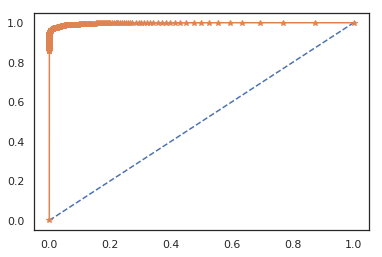

In [257]:
# ----------------------------------------------
# Metrique AUC et Cf(ROC)
# ---------------------------------------------- 

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = Xa, Xt, ya, yt

# fit a model
model = ExtraTreesClassifier(n_estimators = 1000)
model.fit(trainX, trainy)

# predict probabilities
probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='*')

# show the plot
pyplot.show()

In [258]:
# Metrique AUC et Cf(ROC), sont a retenir, car nos datas ont ete reequilibrees sur le labels avec (1/2;1/2)

f1=0.975 auc=0.998 ap=0.998


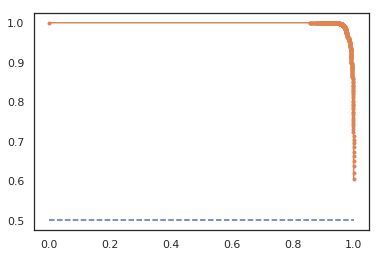

In [259]:
# ----------------------------------------------
# Metrique F1_score
# ---------------------------------------------- 

# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = Xa, Xt, ya, yt

# fit a model
model = ExtraTreesClassifier(n_estimators = 1000)
model.fit(trainX, trainy)

# predict probabilities
probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = model.predict(testX)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)

# calculate F1 score
f1 = f1_score(testy, yhat)

# calculate precision-recall AUC
auc = auc(recall, precision)

# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))

# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.')

# show the plot
pyplot.show()

In [260]:
# Analyse F1-score (confirmatoire resultats AUC), metrique a utiliser en desequilibre de classes.

In [261]:
# ----------------------------------------------
# SELECTION DE Xi avec ERT
# ---------------------------------------------- 
# https://scikit-learn.org/stable/modules/feature_selection.html

In [262]:
# Poptot [train(a)+test(t)]
tot = pd.concat([df_small,df_smallt], axis=0)
tot.shape

(68000, 188)

In [263]:
# sanity check
#tot.head()

In [264]:
# separation Xi et label
Xtot=tot.values[:,:-1]
ytot=tot.values[:,-1]

In [265]:
Xtot.shape

(68000, 187)

In [266]:
ytot.shape

(68000,)

In [267]:
Xtot= pd.DataFrame(Xtot)
type(Xtot)

pandas.core.frame.DataFrame

In [268]:
type(ytot)

numpy.ndarray

In [269]:
# 1.13.4.2. Sélection des Xi basée sur l'arborescence 
# https://scikit-learn.org/stable/modules/feature_selection.html

In [270]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X, y = Xtot, ytot
X.shape

clf = ExtraTreesClassifier(n_estimators=1500)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
Xnew = model.transform(X)

Xnew.shape      

(68000, 41)

In [271]:
# analyse SELECTION DES Xi : reduction x4 du nb de Xi de 187 a 4x

Feature ranking:
1. feature 185 (0.044396)
2. feature 184 (0.039418)
3. feature 182 (0.038625)
4. feature 180 (0.038571)
5. feature 183 (0.035205)
6. feature 181 (0.034021)
7. feature 179 (0.030760)
8. feature 186 (0.029738)
9. feature 177 (0.028763)
10. feature 178 (0.028214)
11. feature 175 (0.027132)
12. feature 176 (0.026624)
13. feature 174 (0.024958)
14. feature 173 (0.021863)
15. feature 172 (0.016678)
16. feature 171 (0.011119)
17. feature 7 (0.010468)
18. feature 18 (0.008481)
19. feature 20 (0.008155)
20. feature 22 (0.008154)
21. feature 16 (0.007996)
22. feature 5 (0.007676)
23. feature 163 (0.007633)
24. feature 3 (0.007516)
25. feature 152 (0.007198)
26. feature 169 (0.007172)
27. feature 19 (0.007027)
28. feature 9 (0.006712)
29. feature 157 (0.006677)
30. feature 170 (0.006669)
31. feature 168 (0.006646)
32. feature 4 (0.006406)
33. feature 14 (0.006361)
34. feature 23 (0.006350)
35. feature 159 (0.006173)
36. feature 47 (0.006157)
37. feature 151 (0.005728)
38. feature

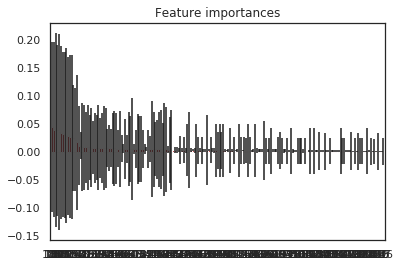

In [272]:
# ----------------------------------------------
# Graphique importance des Xi
# ---------------------------------------------- 

importances = clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [273]:
# analyse du graphe importance = interpretation avec un Cardiologue
# 10 premiers Xi criter importance = 186 a 177 ? (dernier Xi de la courbe energie ?)

In [274]:
# ---------------------------------
# prediction simple avec ExtraTrees et selection de Xi = Xnew
# ---------------------------------

# Xnew > Xa, xt ET y > ya, yt
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

import numpy as np
from sklearn.model_selection import train_test_split
xa, xt, ya, yt = train_test_split(Xnew, y, test_size=0.2)


In [275]:
#================================
## STOP STOP STOP - aller directement MLP
#================================

In [276]:
xa.shape

(54400, 41)

In [277]:
xt.shape

(13600, 41)

In [278]:
ya.shape

(54400,)

In [279]:
yt.shape

(13600,)

In [280]:
# Mélange le jeu de données
from sklearn.utils import shuffle
xa,ya = shuffle(xa,ya)

# Crée une forêt de 1000 arbres
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators = 1000)
# Apprend le modèle
forest.fit(xa,ya)

# Prédit la sortie
yp = forest.predict(xt)


In [281]:
# matrice de confusion
table=pd.crosstab(yp,yt)
table= np.asarray(table)
print(table)

[[6823   74]
 [   9 6694]]


In [282]:
txBC = (np.sum(table.diagonal())/np.sum(table))*100
print("TxBC ExtraTrees = ", txBC, "%")

TxBC ExtraTrees =  99.38970588235294 %


In [283]:
# taux d'erreur
print("TxErreur ExtraTrees = ", round((100-txBC),4), "%")

TxErreur ExtraTrees =  0.6103 %


In [284]:
# -------------------------------------------------------------------
# analyse: le Taux de Bien Classe ExtraTrees est ameliore avec 1 procedure de selection de Xi
# -------------------------------------------------------------------

In [285]:
## STOP STOP STOP

AUC: 1.000


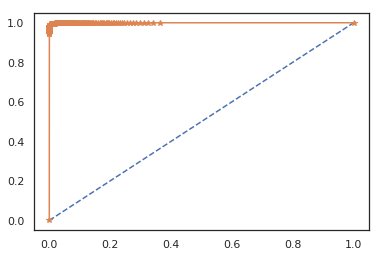

In [286]:
# ----------------------------------------------
# Metrique AUC et Cf(ROC)
# ---------------------------------------------- 


# avec ExtraTrees et selection de Xi = Xnew

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = xa, xt, ya, yt

# Mélange le jeu de données
from sklearn.utils import shuffle
trainX, trainy = shuffle(trainX,trainy)

# fit a model
model = ExtraTreesClassifier(n_estimators = 1000)
model.fit(trainX, trainy)

# predict probabilities
probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='*')

# show the plot
pyplot.show()

(i).2. validation croisee et gridsearch() :

In [287]:
# --------------------------
# validation croisee simple
# --------------------------
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [288]:
# Mélange le jeu de données
from sklearn.utils import shuffle
xa,ya = shuffle(xa,ya)

# Crée une forêt de 1000 arbres
from sklearn.ensemble import ExtraTreesClassifier
ERT = ExtraTreesClassifier(n_estimators = 1000)

# Apprend le modèle
ERT.fit(xa,ya)

# Prédit la sortie
yp = ERT.predict(xt)

# Evalue le modèle (score par défaut)
print("score accuracy = ", round(ERT.score(xt,yt),4)*100,"%")

# Utilise une métrique
from sklearn.metrics import zero_one_loss
a = zero_one_loss(yt,yp)*100
print("zero loss      = ", round(a,4),"%")

#----------------------------------------------------------------

# Validation croisée avec fonction prédéfinie
# et = ExtraTreesClassifier(n_estimators = 1000)

from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix


cv_results = cross_validate(ERT,Xnew,y, 
                            cv = 10, 
                            scoring = ("accuracy"),
                            return_train_score=True,
                            n_jobs=-1)
sorted(cv_results.keys())
#cv_results['test_score'].mean()
#cv_results['test_score'].std()

mean_score, std_score = (cv_results['test_score'].mean())*100, (cv_results['test_score'].std())*100
print("Accuracy moy. (%) :",'Score = %.2f | (Std = +/- %.2f )' % (mean_score, std_score))

score accuracy =  99.38 %
zero loss      =  0.6176 %
Accuracy moy. (%) : Score = 99.23 | (Std = +/- 0.71 )


In [289]:
# --------------------------
#  gridsearch() simple
# --------------------------
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [290]:
# Recherche des meilleurs paramètres par GridSearch - sur 1 parametre = max_depth
# --------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

#Optimisation de la profondeur de l'arbre
#param=[{"max_depth":list(range(2,15))}]
param=[{"max_depth":list(range(1,25))}]
tree= GridSearchCV(ExtraTreesClassifier(n_estimators = 1000),param,cv=10,n_jobs=-1)

start = time.time()

treeOpt=tree.fit(xa, ya)

elapsed = time.time()
elapsed = elapsed - start
print ("Spent Time: ", round(elapsed,2))
start = time.time()

tree.best_estimator_.fit(xa, ya)

elapsed = time.time()
elapsed = elapsed - start
print ("Learning Time: ", round(elapsed,2))

# paramètre optimal
#print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

a, b = round(treeOpt.best_score_,2)*100 , treeOpt.best_params_

#print("Accuracy moy. (%) :",'Score = %.2f | (Std = +/- %.2f )' % (mean_score, std_score))

print("Accuracy (%):", 'Score = %f | Param. Opti = %s' % (a,b))

Spent Time:  2125.46
Learning Time:  19.21
Accuracy (%): Score = 98.000000 | Param. Opti = {'max_depth': 24}


In [291]:
# enregistrement du best modele
# --------------------------
import pickle
pickle.dump(tree.best_estimator_, open("tree.best_estimator_","wb"))

In [292]:
# --------------------------
# prévision de l'échantillon test
# --------------------------
yp = treeOpt.predict(xt)

In [293]:
# matrice de confusion
table=pd.crosstab(yp,yt)
print(table)

col_0   0.0   1.0
row_0            
0.0    6825   169
1.0       7  6599


In [294]:
table= np.asarray(table)

In [295]:
txBC = (np.sum(table.diagonal())/np.sum(table))*100
print("TxBC ExtraTrees = ", txBC, "%")

TxBC ExtraTrees =  98.70588235294117 %


In [296]:
# Evalue le modèle (score par défaut)
print("score = ", round(treeOpt.score(xt,yt),4)*100,"%")

# Utilise une métrique
from sklearn.metrics import zero_one_loss
print("zero loss = ", round(zero_one_loss(yt,yp),4)*100,"%")


score =  98.71 %
zero loss =  1.29 %


In [297]:
# --------------------------
# validation croisee simple avec best classifieur du gridsearch()
# --------------------------


# Validation croisée avec fonction prédéfinie
#et = ExtraTreesClassifier(n_estimators = 20)

from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix


cv_results = cross_validate(treeOpt,xt,yt, 
                            cv = 10, 
                            scoring = ("accuracy"),
                            return_train_score=True,
                            n_jobs=-1)
sorted(cv_results.keys())
#cv_results['test_score'].mean()
#cv_results['test_score'].std()

mean_score, std_score = (cv_results['test_score'].mean())*100, (cv_results['test_score'].std())*100
print("Accuracy moy. (%) :",'Score = %.2f | (Std = +/- %.2f )' % (mean_score, std_score))

Accuracy moy. (%) : Score = 98.24 | (Std = +/- 0.30 )


In [298]:
# --------------------------
# validation croisee simple + gridsearch() sur tous les parametres du classifieur extratees
# --------------------------

#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [299]:
# Identifier les parametres du classifieur ExtraTree
# --------------------------------------------------
# Nous allons utiliser ces paramètres comme point de départ. 
# Je me suis appuyé sur la documentation sklearn 
# pour déterminer les fonctionnalités à modifier et les options disponibles.

In [300]:
#https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [301]:
from sklearn.ensemble import ExtraTreesClassifier

ERT = ExtraTreesClassifier(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(ERT.get_params())

Parameters currently in use:

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [302]:
# Random Search with Cross Validation
# -----------------------------------

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

# criterion = The function to measure the quality of a split
criterion = ['gini', 'entropy']

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 1)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5]

# Method of selecting samples for training each tree
bootstrap = [False, True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [False, True],
 'max_depth': [1, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 3, 4, 5],
 'n_estimators': [100, 200, 300, 400, 500]}


In [303]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
ERT = ExtraTreesClassifier(random_state = 42)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

ERT_random = RandomizedSearchCV(estimator=ERT, 
                                param_distributions=random_grid,
                                n_iter = 1000, 
                                scoring="accuracy", 
                                cv = 10, 
                                verbose=2, 
                                random_state=42, 
                                n_jobs=-1,
                                return_train_score=True)

# Fit the random search model
ERT_random.fit(xa, ya)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


/home/dlp/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 800 is smaller than n_iter=1000. Running 800 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 60.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 97.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=1000, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, None], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [False, True]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='accuracy', verbose=2)

In [304]:
ERT_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [305]:
#ERT_random.cv_results_

In [306]:
xt.shape, yt.shape

((13600, 41), (13600,))

In [307]:
# Fonction evaluation du modele

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / len(test_labels))
    #mape = (sum(errors)/len(test_labels))*100
    mape = (np.count_nonzero(errors!=0)/len(test_labels))*100
    accuracy = 100 - mape 
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [308]:
# pointeur de var
test_features = xt
test_labels = yt

In [309]:
# Évaluer le modèle par défaut
base_model = ExtraTreesClassifier(n_estimators = 1000, random_state = 42)
base_model.fit(xa, ya)
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 0.0062 degrees.
Accuracy = 99.38%.


In [310]:
# Évaluer le meilleur issu modèle de recherche aléatoire
best_random = ERT_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 0.0063 degrees.
Accuracy = 99.37%.


In [311]:
# delta accuracy
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.01%.


In [312]:
# Gridsearch()
# Nous pouvons maintenant effectuer une recherche sur la grille en construisant
# le résultat de la recherche aléatoire. Nous allons tester une gamme d'hyperparamètres
# autour des meilleures valeurs renvoyées par la recherche aléatoire.

In [313]:
# reminder des para opti
ERT_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [314]:
# Gridsearch() - avec grille hyperparametre re-serree

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [300, 400, 500],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto'],
    'max_depth': [10, 20, 30, 40],
    'bootstrap': [False]
}

# Create a base model
ERT = ExtraTreesClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = ERT, 
                           param_grid = param_grid, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2, 
                           return_train_score=True)

In [315]:
# Fit the grid search to the data
grid_search.fit(xa, ya)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 66.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 97.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [300, 400, 500], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40], 'bootstrap': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [316]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [317]:
# Evaluate the Best Model from Grid Search
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

Model Performance
Average Error: 0.0061 degrees.
Accuracy = 99.39%.


In [318]:
# delta accuracy
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.01%.


AUC: 1.000


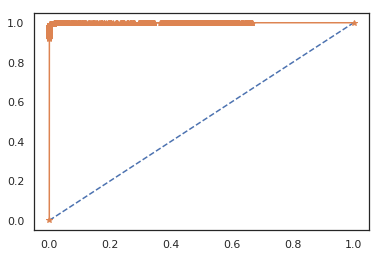

In [319]:
# ----------------------------------------------
# Metrique AUC et Cf(ROC)
# ---------------------------------------------- 


# avec ExtraTrees et selection de Xi = Xnew

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#probs = grid_search.predict_proba(xt)
probs = best_grid.predict_proba(xt)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(yt, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yt, probs)

# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='*')

# show the plot
pyplot.show()

In [320]:
#================================
STOP STOP STOP - MLP ****

#================================

SyntaxError: invalid syntax (<ipython-input-320-a2fc6c4069d6>, line 2)

(ii) Classe de classifieurs 2 : classifieurs du deep learning

In [ ]:
# https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
# https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

In [ ]:
# https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library

In [ ]:
# resesau CNN simple - perceptron
# https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/

In [321]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from keras.constraints import max_norm
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [322]:
Xnew.shape, y.shape

((68000, 41), (68000,))

In [323]:
# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

In [ ]:
#----------------------------
# MODELE perceptron BASELINE
#----------------------------

In [325]:
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [326]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=500, batch_size=32, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, Xnew, y, cv=kfold)
print("Accuracy Moy | EC : %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy Moy | EC : 97.76% (0.19%)


In [ ]:
# p384

In [ ]:
#https://github.com/lspvic/jupyter_tensorboard

In [ ]:
#----------------------------
# MODELE perceptron ADVANCED = controler l overfitting
#----------------------------
# https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/

In [ ]:
# (+) 1 couche cachee

In [327]:
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# tests des parametres sans delta(+) accuracy
# --------------------------------
# (+) 1 couche cachee 
# (+) 1 dropout sur la couche visible
# (+) 1 dropout sur couche cachee
# (+) learning rate adaptatif

In [ ]:
#----------------------------
# MODELE perceptron ADVANCED = controler l overfitting + courbes accuracy / losses
#----------------------------

acc: 98.74%
acc: 98.53%
acc: 98.46%
acc: 99.00%
acc: 98.43%
acc: 98.51%
acc: 98.60%
acc: 98.46%
acc: 98.75%
acc: 98.54%
98.60% (+/- 0.17%)
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


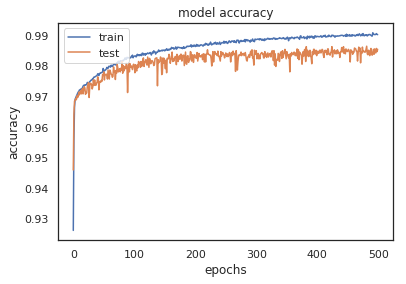

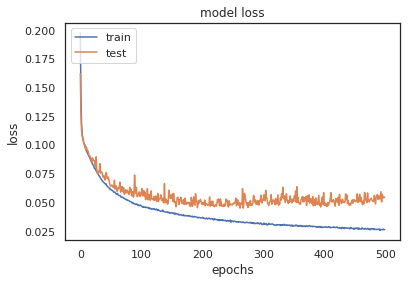

In [328]:
#https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

# ----------------
# https://machinelearningmastery.com/better-deep-learning-neural-networks-crash-course/
# ----------------

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(Xnew, y):
    # create model
    model = Sequential()
    model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fit the model
    history = model.fit(Xnew[train], y[train],
                        validation_data=(Xnew[test], y[test]),
                        epochs=500, batch_size=32, verbose=0)
    
    # evaluate the model
    scores = model.evaluate(Xnew[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

In [ ]:
# ----------------------------------------------------------
# MLP 2 couches avec AUC - metric [CrossValidation - k = 10]
# ----------------------------------------------------------


In [ ]:
# https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
# https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
# http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/plot_roc_crossval.html

In [329]:
import tensorflow as tf
from keras import backend as K

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(Xnew, y):
    # create model
    model = Sequential()
    model.add(Dense(41, input_dim=41, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    
    # AUC metric
    def auc(y_true, y_pred):
        auc = tf.metrics.auc(y_true, y_pred)[1]
        K.get_session().run(tf.local_variables_initializer())
        return auc 
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc])
    
    # Fit the model
    history = model.fit(Xnew[train], y[train],
                        validation_data=(Xnew[test], y[test]),
                        epochs=500, batch_size=32, verbose=0)
    
    # evaluate the model
    scores = model.evaluate(Xnew[test], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


auc: 99.71%
auc: 99.76%
auc: 99.81%
auc: 99.78%
auc: 99.82%
auc: 99.82%
auc: 99.82%
auc: 99.84%
auc: 99.80%
auc: 99.81%
99.80% (+/- 0.04%)


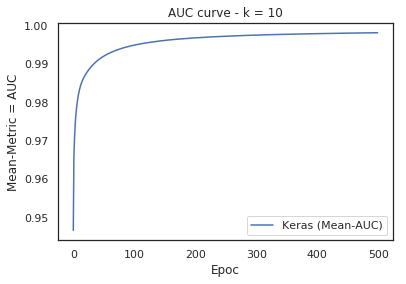

In [330]:
# -------------------------------------------
# AUC + ROC Curve avec classifier MLP avec CV
# -------------------------------------------

# plot metrics
plt.figure(1)
plt.plot(history.history['auc'],label='Keras (Mean-AUC)')

#pyplot.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('Epoc')
plt.ylabel('Mean-Metric = AUC')
plt.title('AUC curve - k = 10')
plt.legend(loc='best')
plt.show()


In [ ]:
# -------------------------------------------
# AUC + ROC Curve avec classifier MLP sans CV
# -------------------------------------------

In [331]:
from sklearn.metrics import roc_curve
Ytestpred = model.predict_classes(Xnew[test]).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y[test],Ytestpred)

In [332]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print("AUC =",round(auc_keras,4)*100,"%")

AUC = 98.45 %


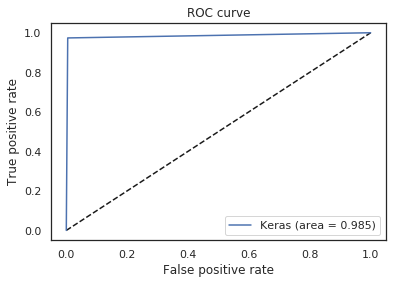

In [333]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Sanity Check [calcul de l AUC a la main]

In [ ]:
# https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/

In [334]:
#http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Tensorflow_Keras_Python.pdf# 

#prédiction sur l'échantillon test
Ytestpred = model.predict_classes(Xnew[test])

#matrice de confusion
from sklearn import metrics
print(metrics.confusion_matrix(y[test],Ytestpred))
print(" ")

#taux de succès
print("AUC =",round(100*metrics.accuracy_score(y[test],Ytestpred),2),"%")
print(" ")

#outil dédié
score = model.evaluate(Xnew[test],y[test])
print(score)

[[3394   16]
 [  89 3300]]
 
AUC = 98.46 %
 
6799/6799 [==============================] - 0s 30us/step
[0.05931832615712905, 0.9981263615240296]


In [335]:
# pour un Run n = 2000 lignes
tpsFINAL=time.clock()
print("temps execution PREPROCESSING en mn = ", (tpsFINAL-tps00)/60)

temps execution PREPROCESSING en mn =  1431.6364739833334


#### classification multi-classes K > 2 et equilibree selon les poids des labels  (a,b,c,d,e)

(i) Classe de classifieurs 1 : classifieurs du machine learning

(ii) Classe de classifieurs 2 : classifieurs du deep learning

In [ ]:
# ***************************************
STOP-STOP-STOP
# ***************************************

In [ ]:
#############################################################################################

#  -----------------------------  FIN TRAVAIL DIDIER LE PICAUT -------------------------

#############################################################################################




## FIN 1ere PARTIE **** Illustration 

### Exemple

In [ ]:
# enregistrement1

In [ ]:
# create a range

# http://www.prepas.org/2013/Info/Liesse/Telecom/2-Numpy.
xsec = np.arange(187)*0.008
xsec

In [ ]:
xsec = np.arange(187)*0.008
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
ax.plot(xsec,mitbih_train.values[1,:-1])
ax.set_xlabel("seconds")
ax.set_ylabel("Amplitude")
plt.show()

In [ ]:
# enregistrement100

In [ ]:
xsec = np.arange(187)*0.008

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
ax.plot(xsec,mitbih_train.values[100,:-1])
ax.set_xlabel("seconds")
ax.set_ylabel("Amplitude")

plt.show()

In [ ]:
sec = np.arange(187)*0.008
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
ax.plot(xsec,mitbih_train.values[0,:-1])
ax.plot(xsec,mitbih_train.values[1,:-1])
ax.plot(xsec,mitbih_train.values[2,:-1])
ax.plot(xsec,mitbih_train.values[3,:-1])
ax.plot(xsec,mitbih_train.values[4,:-1])
ax.plot(xsec,mitbih_train.values[5,:-1])
ax.plot(xsec,mitbih_train.values[6,:-1])
ax.plot(xsec,mitbih_train.values[7,:-1])
ax.plot(xsec,mitbih_train.values[8,:-1])
ax.plot(xsec,mitbih_train.values[9,:-1])
ax.set_xlabel("seconds")
ax.set_ylabel("Amplitude")
plt.show()

In [ ]:
# http://www.prepas.org/2013/Info/Liesse/Telecom/2-Numpy.html
# slicing pour iterer sur les lignes

In [ ]:
# Graphe des 1 ECG normal + 4 types d'arythmies ECG

In [ ]:
fig = plt.figure(figsize=(15,10))

for i,(k,v) in enumerate(mitbih_train.groupby("label")):
    ax = fig.add_subplot(3,2,i+1)
    ax.plot(v.values[:50,:-1].T, color=COLOR[int(k)])
    
    ax.set_title(NAME_DIC[k])
    ax.set_xlabel("seconds")
    ax.set_ylabel("Amplitude")

plt.show()

# Répartition des catégories

## Test

In [ ]:
data_count = mitbih_test.label.astype(int).value_counts()

#Rename index to add percentage
new_index = ["Classe :" + NAME_DIC[k]+ ": %.2f%%" %(v*100/N_test) for k,v in data_count.iteritems()]

fig=plt.figure(figsize= (5,5))
ax = fig.add_subplot(1,1,1)
ax.barh(range(5), data_count.values, 0.9, color = COLOR, tick_label = new_index)
for k in range(5):
    ax.text(data_count.values[k], k, str(data_count.values[k]))

    plt.show()


In [ ]:
#=== TEST data

# 5 classes desequilibrees dont :
# avec 1 majoritaire - frequence > 80%
# 4 minoritaires  - frequence < 10%
# pb de classification multiclasses supervisees avec des xi en courbes fonctionnelles
# et detection d evenement rare ECG avec arythmies

## Train

In [ ]:
data_count = mitbih_train.label.astype(int).value_counts()

#Rename index to add percentage
new_index = ["Classe :" + NAME_DIC[k]+ ": %.2f%%" %(v*100/N_train) for k,v in data_count.iteritems()]

fig=plt.figure(figsize= (5,5))
ax = fig.add_subplot(1,1,1)
ax.barh(range(5), data_count.values, 0.9, color = COLOR, tick_label = new_index)
for k in range(5):
    ax.text(data_count.values[k], k, str(data_count.values[k]))

plt.show()

In [ ]:
#=== TEST data = on retrouve le desequiilbre de classes ECG 

## Augmentation des données

Les données sont fortement déséquilibrées. Particulièrement la classe "F" qui ne possèdent que 641 éléments dans l'apprentissage. Pour corriger cela on peut pocéder à 
    * de l'oversampling, en dupliquant certaines série
    * de l'augmentation de données, en créant de nouveaux signaux par déformation des signaux existant

### Amplify

Amplifie le signal suivant la formule suivante : 

new_x =  $-\alpha\cdot x^2 + -\alpha\cdot x^2 + x$ avec $-0.5<\alpha<0.5$

In [ ]:
#https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random.html
#Retourne les valeurs aléatoires dans l'intervalle de demi-ouverture [0.0, 1.0).


def amplify(x):
    alpha = (np.random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

x_toy = mitbih_train.groupby("label").get_group(3).values[0,:-1]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(xsec,x_toy, label = 'original signal')
ax.plot(xsec,amplify(x_toy), label = 'amplify signal')

plt.legend()


### Stretch

Etire ou "compresse" le signal. Cette étape est effectué grace à la fonction *resample* du package *scipy.signal* qui permet de ré-echantilloner un signal grace à une transformé de Fourier.

In [ ]:
from scipy.signal import resample

def stretch(x):
    l = int(187 * (1 + (np.random.random()-0.5)/3))
    y = sc.signal.resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(xsec,x_toy, label = 'original signal')
ax.plot(xsec,stretch(x_toy), label = 'stretch signal')

plt.legend()

En utilisant une de ces deux fonctions, ou en combinant les deux, il est alors possible de créer de nouveau signaux.

# Création de Features

## General Features

In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/ 
# http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Data_Manipulation_Pandas.pdf

X_train = mitbih_train.values[:,:-1]
Y_train = mitbih_train.values[:,-1]

X_test = mitbih_test.values[:,:-1]
Y_test = mitbih_test.values[:,-1]

In [ ]:
# http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf
print('data Xi',X_train)
print(' ')
print('#===============================================================================')
print(' ')
print('data Yi',X_train)

### Dyadique

Cette section permet de créer de nouvelles variables ou "features" à partir de statistiques élémentaires : La *moyenne*, *la médiane* etc...
Afin de rendre ces features plus pertinentes, une technique consiste à créer ces features sur différentes divisions du signal. 

On va donc calculer pour chaque statistique (par exemple la moyenne) sa valeur sur l'ensemble de la courbe. On va ensuite découper le signal en deux, et calculer la moyenne sur la première et la seconde partie. On répète cette opération sur un découpage du signal en 4 divisions, puis en 8 et ainsi de suite pour différentes puissances de 2. 

Trois fonctions sont définies ci-dessous afin de créer ces nouvelles features.

* **basic_features** : Calcul des statistiques simples pour chacun des signaux contenus dans la matrice *X*.
* **basic_features_per_block** : Calcul des statistiques simples sur chaque division d'un partitionnement spécifique des signaux contenus dans la matrice X. 
Ce partitionnement peut être définies à partir d' **un des deux** paramètres :
    * n_block : Nombre de division.
    * n_step : Taille d'une division.
* **basic_features_dyadique** : Calcul des statistiques simples sur différents partitionnements des signaux contenus dans la matrice X. Les partitionnement générés sont tous les partitionnement en 2^i divisions du signal, pour i allant de 0 à *power* ou *power* est un argument de la fonction. 
    



In [ ]:
# ecriture d une fonction
def basic_features(X):
    basic_features_list = []
    basic_features_list.append(np.mean(X, axis=1))
    basic_features_list.append(np.median(X, axis=1))
    basic_features_list.append(np.max(X, axis=1))
    basic_features_list.append(np.argmax(X, axis=1))
    basic_features_list.append(np.std(X ,axis=1))
    
    basic_features_list.append(np.apply_along_axis(sc.stats.entropy, 1, X))

    basic_features_list.append(np.apply_along_axis(sc.stats.skew, 1, X))
   
    basic_features_list.append(np.apply_along_axis(sc.stats.kurtosis, 1, X))
  

    X_bf = np.vstack(basic_features_list).T
    return X_bf

# Exemple sur un signal
X_test_bf = basic_features(X_test[:1,:])
print("All signal : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_bf[0]))


In [ ]:
def basic_features_per_block(X, n_block=None, n_step=None):
    N = X.shape[1]
    if not(n_block is None) and not(n_step is None):
        raise ValueError("You can't specify both n_block AND n_step")
    elif (n_block is None) and (n_step is None):
        raise ValueError("You have to specify  either n_block OR n_step")
    elif n_block is None:
        blocks = np.hstack((np.arange(0,N,n_step),N))
    else:
        blocks = np.linspace(0,N,n_block+1,dtype=int)
    basic_features_per_block = []
    n_blocks = len(blocks)-1
    for s_block, e_block in [blocks[k:k+2] for k in range(n_blocks)] :
        basic_features_per_block.append(basic_features(X[:,s_block:e_block]))
        
    return np.hstack(basic_features_per_block), blocks

#Exemple sur un signal
X_test_bfbloc = basic_features_per_block(X_test[:1,:], n_block=2)
print("First block  : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_bfbloc[0][0][:8]))
print("Second block : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_bfbloc[0][0][8:]))

In [ ]:
#LONG!
def basic_features_dyadique(X, power):
    N = X.shape[1]
    basic_features_dyatique = []
    for p in range(power+1):
        basic_features_dyatique.append(basic_features_per_block(X, n_block=2**p)[0])
    #[print(k.shape) for k in basic_features_dyatique]
    print((k.shape) for k in basic_features_dyatique)

    return np.hstack(basic_features_dyatique)

#Exemple sur un signal
X_test_dy = basic_features_dyadique(X_test[:1,:], power=1)
print("All Signal  : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_dy[0][:8]))
print("First block  : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_dy[0][8:16]))
print("Second block : Mean = %.2f, Median = %.2f, Max = %.2f, Argmax = %.2f, std = %.2f, entropy = %.2f, skew = %.2f, kurtosis = %.2f" %tuple(X_test_dy[0][16:]))

In [ ]:
#==========================================================================================#
# P.1 > CHAPITRE.2 MACHINE LEARNING = utilisation des classifieurs
#==========================================================================================#

### ACP

In [ ]:
def plot_variance_acp(fig, acp, X_acp, whis=1.5): 
    ax = fig.add_subplot(1,2,1)
    ax.bar(range(10), acp.explained_variance_ratio_[:10]*100, align='center',
        color='grey', ecolor='black')
    ax.set_xticks(range(10))
    ax.set_ylabel("Variance")
    ax.set_title("", fontsize=35)
    ax.set_title("Pourcentage de variance expliquee \n des premieres composantes", fontsize=20)
    
    ax = fig.add_subplot(1,2,2)
    box=ax.boxplot(X_acp[:,0:10], whis=whis)
    ax.set_title("Distribution des premieres composantes", fontsize=20)
    
def plot_pca(ax, X, acp, nbc, nbc2, colors, markersizes):
    ax.scatter(X[:,nbc-1],X[:,nbc2-1],marker=".", color= colors, s=markersizes)
    ax.set_xlabel("PC%d : %.2f %%" %(nbc,acp.explained_variance_ratio_[nbc-1]*100), fontsize=15)
    ax.set_ylabel("PC%d : %.2f %%" %(nbc2,acp.explained_variance_ratio_[nbc2-1]*100), fontsize=15)


In [ ]:
#=== dataset utilise mitbih_train.values[:,:-1]


import sklearn.decomposition as sdec 
pca = sdec.PCA()
X_r = pca.fit_transform(mitbih_train.values[:,:-1])

In [ ]:
fig = plt.figure(figsize=(15,10))
plot_variance_acp(fig, pca, X_r, whis=100)
fig.suptitle("Resultat ACP", fontsize=25)

In [ ]:
colors=[COLOR[int(y)] for y in mitbih_train.values[:,-1]]
markersizes = [20 for _ in range(N_train)]
fig = plt.figure(figsize=(10,10), )
ax = fig.add_subplot(1,1,1)
plot_pca(ax,X_r, pca, 1, 2, colors, markersizes)

### FDA

In [ ]:
import sklearn.discriminant_analysis as sda
method = sda.LinearDiscriminantAnalysis() 
lda=method.fit(mitbih_train.values[:,:-1],mitbih_train.values[:,-1])
X_r2=lda.transform(mitbih_train.values[:,:-1])

In [ ]:
colors=[COLOR[int(y)] for y in mitbih_train.values[:,-1]]
markersizes = [20 for _ in range(N_train)]
fig = plt.figure(figsize=(10,10), )
ax = fig.add_subplot(1,1,1)
plot_pca(ax,X_r2, lda, 1, 2, colors, markersizes)

In [ ]:
#https://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py

In [ ]:
#==================================
# classifieur a tester
#==================================

# 1. AFD Fisher                
# 2. regression logistique
# 3. glm (lasso, ridge, elasticnet)

# OK 4. arbres de decision

# 5. mars

# OK 6. svm
# OK 7. classifieur naïf bayesien
# OK 7. k plus proches voisin

# 8. Xgboost

# ACP > CAH > AFD ====> t-sne
# RF

#====================== TOUTES LES FAMILLES DE MODELES ======================
# https://scikit-learn.org/stable/supervised_learning.html
# https://scikit-learn.org/stable/modules/classes.html
#======================


In [ ]:
# https://scikit-cuda.readthedocs.io/en/latest/install.html#quick-installation

In [ ]:
#==================================
# https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/
# framework réutilisable pour la vérification ponctuelle d'algorithmes en Python
#==================================

In [ ]:
#=============================
# CODE PIPE MODELS
#=============================

# binary classification spot check script
import warnings
import time


from numpy import mean
from numpy import std
from matplotlib import pyplot

from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression          #1
from sklearn.linear_model import RidgeClassifier             #2   
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier #4
from sklearn.neighbors import KNeighborsClassifier           #5
from sklearn.tree import DecisionTreeClassifier              #6
from sklearn.tree import ExtraTreeClassifier                 #7
from sklearn.svm import SVC                                  #8
from sklearn.naive_bayes import GaussianNB                   #9
from sklearn.ensemble import AdaBoostClassifier              #10
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

tps0=time.clock()

# load the dataset, returns X and y elements
#def load_dataset():
	#return make_classification(n_samples=1000, n_classes=2, random_state=1)
	#return sklearn.datasets.make_multilabel_classification(n_samples=1000,n_classes=5,n_labels=5,random_state=1)

# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
    # linear models
	models['logistic'] = LogisticRegression()
	alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
	models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
	models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
	
    # non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
	models['cart'] = DecisionTreeClassifier()
	models['extra'] = ExtraTreeClassifier()
	models['svml'] = SVC(kernel='linear')
	models['svmp'] = SVC(kernel='poly')
	models['svmg'] = SVC(kernel='rbf')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVC(C=c)
	models['bayes'] = GaussianNB()
	
    # ensemble models
	n_trees = 100
	models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
	models['bag'] = BaggingClassifier(n_estimators=n_trees)
	models['rf'] = RandomForestClassifier(n_estimators=n_trees)
	models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
	models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models

# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	
    # standardization
	steps.append(('standardize', StandardScaler()))
	
    # normalization
	steps.append(('normalize', MinMaxScaler()))
	
    # the model
	steps.append(('model', model))
	
    # create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	
    # create the pipeline
	pipeline = make_pipeline(model)
	
    # evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores

# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores

# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		
        # evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		
        # show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	
    # check for no results
	if len(results) == 0:
		print('no results')
		return
	
    # determine how many results to summarize
	n = min(top_n, len(results))
	
    # create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	
    # sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	
    # reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	
    # retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	
    # print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	
    # boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	pyplot.savefig('spotcheck.png')


In [ ]:
#==================
# Train DATA (***)
# reprise des donnees 
# construction d un echantillon pour implementer le pipe
#==================


In [ ]:
# dimension du dataframe
print("dimension dataframe", mitbih_train.shape)

In [ ]:
mitbih_train.head(5)

In [ ]:
#================== 
# tirer un échantillon aléatoire simple selon une distribution uniforme
#================== 
# https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor2-python-pandas.pdf


#==================
# train DATA
#==================

# pour les données ecg:
N=87554 # taille du fichier
#n=(3*875) # taille de l’échantillon
n=(600)


lin2skipe=[1] # lire la première ligne
# ne pas lire N-n lignes tirées aléatoirement
lin2skipe.extend(np.random.choice(np.arange(1,N),(N-n),replace=False))


df_small= pd.read_csv("mitbih_train.csv.zip",
                      skiprows=lin2skipe,
                      header=None, 
                      names=Colnames
                     )
#print(df_small)

In [ ]:
# load dataset
#X, y = load_dataset()


X=df_small.values[:,:-1]
y=df_small.values[:,-1]


# get model list
models = define_models()
# evaluate models
results = evaluate_models(X, y, models)


# summarize results
summarize_results(results)

tps1=time.clock()
print("temps execution en mn = ", (tps1-tps0)/60)

In [ ]:
#==================
# train TEST
#==================

# pour les données ecg:
N=6774 # taille du fichier
#n=(2*677) # taille de l’échantillon
n=300
#n=N

lin2skipe=[1] # lire la première ligne
# ne pas lire N-n lignes tirées aléatoirement
lin2skipe.extend(np.random.choice(np.arange(1,N),(N-n),replace=False))


df_smallt= pd.read_csv("mitbih_test.csv",
                      skiprows=lin2skipe,
                      header=None, 
                      names=Colnames
                     )
#print(df_smallt)

In [ ]:
# load dataset
#X, y = load_dataset()


X=df_smallt.values[:,:-1]
y=df_smallt.values[:,-1]


# get model list
models = define_models()
# evaluate models
results = evaluate_models(X, y, models)


# summarize results
summarize_results(results)

tps1=time.clock()
print("temps execution en mn = ", (tps1-tps0)/60)

In [ ]:
#================================================================ FIN PARTIE 1.

In [ ]:
#=============================================================================================================#
# PARTIE.2 APPRENTISSAGE STATISTIQUE - CLASSIFIEURS USUELS avec prise en compte des Xi en serie chronologique
#=============================================================================================================#

### Ondelette

In [ ]:
def coef_pyramid_plot(ax, coefs, first=0, scale='uniform'):
    n_levels = len(coefs)
    n = 2**(n_levels - 1) # assumes periodic

    if scale == 'uniform':
        biggest = [np.max(np.abs(np.hstack(coefs)))] * n_levels
    else:
        # multiply by 2 so the highest bars only take up .5
        biggest = [np.max(np.abs(i))*2 for i in coefs]

    for i in range(first,n_levels):
        x = np.linspace(2**(n_levels - 2 - i), n - 2**(n_levels - 2 - i), 2**i)
        ymin = n_levels - i - 1 + first
        yheight = coefs[i]/biggest[i]
        ymax = yheight + ymin
        ax.vlines(x, ymin, ymax, linewidth=1.1)

    ax.set_xlim(0,n)
    ax.set_ylim(first - 1, n_levels)
    ax.yaxis.set_ticks(np.arange(n_levels-1,first-1,-1))
    ax.yaxis.set_ticklabels(np.arange(first,n_levels))
    ax.tick_params(top=False, right=False, direction='out', pad=6)
    ax.set_ylabel("Levels", fontsize=14)
    ax.grid(True, alpha=.85, color='white', axis='y', linestyle='-')
    ax.set_title('Wavelet Detail Coefficients', fontsize=16,
            position=(.5,1.05))

In [ ]:
# https://github.com/PyWavelets/pywt
#========================================= source activate tensorflow_gpuenv
# conda install -c conda-forge pywavelets

In [ ]:
import pywt
from pywt import wavedec

In [ ]:
fig = plt.figure(figsize=(15,8))
ax=fig.add_subplot(1,1,1)
coef = pywt.wavedec(mitbih_train.values[:,:-1], 'db1')
coef_pyramid_plot(ax, coef[1:]) ;
fig.tight_layout()

In [ ]:
X_train_db = np.concatenate(pywt.wavedec(mitbih_train.values[:,:-1], 'db1'), axis=1)
## ACP 
pca = sdec.PCA()
X_train_db_pca = pca.fit_transform(X_train_db)

In [ ]:
fig = plt.figure(figsize=(15,10))
plot_variance_acp(fig, pca, X_train_db_pca)

In [ ]:
colors=[COLOR[int(y)] for y in mitbih_train.values[:,-1]]
markersizes = [20 for _ in range(N_train)]
fig = plt.figure(figsize=(10,10), )
ax = fig.add_subplot(1,1,1)
plot_pca(ax,X_train_db_pca, pca, 1, 2, colors, markersizes)

In [ ]:
#=============================================================================================================#
# PARTIE.3 APPRENTISSAGE STATISTIQUE - METHODES EN TRAITEMENTS DE SIGNAL ECG
#=============================================================================================================#

In [ ]:
# Analyser un signal de fréquence cardiaque discret en utilisant Python - Partie 1

# source = http://www.paulvangent.com/2016/03/15/analyzing-a-discrete-heart-rate-signal-using-python-part-1/

In [ ]:
xp = mitbih_train.values[0:5,:-1]
fig = plt.figure(figsize=(15,15),)
ax = fig.add_subplot(1,1,1)
plt.title("courbe frequence cardiaque")
plt.plot(xp) 
plt.show() 


In [ ]:
#Calculate moving average with 0.75s in both directions, then append do dataset


In [ ]:
#Calculate moving average with 0.75s in both directions, then append do dataset

hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
fs = 125 #The example dataset was recorded at 100Hz

#Calculate moving average
mov_avg = mitbih_train.rolling(int(hrw*fs)).mean() 
#mov_avg

#Impute where moving average function returns NaN, 
# which is the beginning of the signal where x hrw
avg_hr = (np.mean(mitbih_train))
#avg_hr


In [ ]:
mov_avg.head()
#print(mov_avg)
print(mov_avg.shape)
s1=87554

In [ ]:
#mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]

# https://machinelearningmastery.com/handle-missing-data-python/
# drop rows with missing values
mov_avg.dropna(inplace=True)
#print(mov_avg)
print(mov_avg.shape)
s2=87462
mov_avg.head()

In [ ]:
nb_ligne_supprimee=(s1-s2)
print("nb de ligne avec NA supprimee = ", nb_ligne_supprimee)

In [ ]:
# For now we raise the average by 20% to prevent the secondary heart 
# contraction from interfering, in part 2 we will do this dynamically
mov_avg = [(x*2) for x in mov_avg]

In [ ]:
#mitbih_train['hart_rollingmean'] = mov_avg
mitbih_train.head()

In [ ]:
# #Append the moving average to the dataframe
# https://gist.github.com/robinvanemden/6a0277b9e99ad8699d2e656626c87dfa